<a href="https://colab.research.google.com/github/kazars24/nlp_laba/blob/main/Lab1_NLP_Kazantsev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 1. Обработка естественного языка.
Вам нужно будет взять [ноутбук](https://drive.google.com/file/d/1euxnmvVeE5byHiTd-axQz4pF9wgEHXmQ/view?usp=sharing) с предсказанием заработной платы, который  Вы разбирали на практике, и улучшить его.

Несколько советов по оформлениею работы:
*   В начале ноутбука добавьте небольшое резюме - что Вами было сделано в ноутбуке: что попробовали, какие результаты получили.
*   Все эксперементы оформите с графиками функции потерь и метриками MAE, MSE. Графики постройте на тренировочных, тестовых и валидационных данных. В конце каждого эксперемента выведите лучшие значения.
*   В конце каждого эксперемента напишите свои выводы. Подкрепите их визуализацией и/или метриками.

**Дедлайн 23 апреля 23:59 МСК**

**Резюме**

**1. Развейте СNN архитектуру**

*   BatchNorm: MSE: 0.16824, MAE: 0.16154;
*   LayerNorm: MSE: 0.04048, MAE: 0.07911;
*   GroupNorm: MSE: 0.03168, MAE: 0.06865;

В данном случае лучшим выбором является GroupNorm, так как это дает лучший результат среди прочих.

*   Параллельные сверточные слои: MSE: 0.03014, MAE: 0.06697;

Это решение дало прирост (хоть и небольшой) результата.
*   Больше слоев: MSE: 0.45070, MAE: 0.18001;

А вот добавление большего числа слоев только ухудшило работу модели, причем значительно (как по метрикам, так и по времени, потому что модель стала больше и, соответственно, тратит больше времени).

*Итог по заданию 1:* наилучший результат показала модель с параллельными сверточными слоями + GroupNorm.

---

**2. Pooling слои стандартные**

*   Максимум по временной компоненте: MSE: 0.02906, MAE: 0.06523;
*   Cреднее по временной компоненте: MSE: 0.04008, MAE: 0.07850;

*Итог по заданию 2:* наилучший результат показала модель с Max Pooling.


---

**3. Предобученные эмбеддинги ('word2vec-google-news-300')**

Результаты:
*   Эмбеддингов, инициализируемых случайно:

      Mean square error: 0.16824

      Mean absolute error: 0.16154
*   Предобученных эмбеддингов с замороженными весами

      Mean square error: 0.10023

      Mean absolute error: 0.14283
*   Предобученных эмбеддингов с обучаемыми весами

      Mean square error: 0.07029

      Mean absolute error: 0.11640

*Итог по заданию 3:* лучший результат дает модель с предобученными эмбеддингами с обучаемыми весами.


---

**4. Замена сверточных слоев на рекуррентные**


*   LSTM: MSE: 0.16074, MAE: 0.18440;
*   GRU: MSE: 0.15205, MAE: 0.17356;


*   LSTM двунаправленная: MSE: 0.20449, MAE: 0.20869;
*   GRU двунаправленная: MSE: 0.15908, MAE: 0.18160;

Замена сверточных слоев рекуррентными не дает более качественного результата.


*   Микс: MSE: 0.04001, MAE: 0.07815;

Такой варинт дает уже неплохой результат.

*Итог по заданию 4:* замена сверточных слоев рекуррентными не дает более качественного результата, но совместное их использование дает нормальный результат.
















In [ ]:
%%shell
jupyter nbconvert --to html /content/Lab1_NLP_Kazantsev.ipynb

[NbConvertApp] Converting notebook /content/Lab1_NLP_Kazantsev.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: data must be valid exactly by one of oneOf definition

Failed validating <unset> in notebook:

On instance:
<unset>
[NbConvertApp] Writing 2037238 bytes to /content/Lab1_NLP_Kazantsev.html


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/Train_rev1.zip
data = pd.read_csv("Train_rev1.csv", index_col=None)
data.shape

(244768, 12)

In [ ]:
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Log1pSalary
0,12612628,engineering systems analyst,engineering systems analyst dorking surrey sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,10.126671
1,12612830,stress engineer glasgow,stress engineer glasgow salary **** to **** we...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,10.308986
2,12612844,modelling and simulation analyst,mathematical modeller / simulation analyst / o...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,10.308986
3,12613049,engineering systems analyst / mathematical mod...,engineering systems analyst / mathematical mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,10.221977
4,12613647,"pioneer , miser engineering systems analyst","pioneer , miser engineering systems analyst do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,10.126671


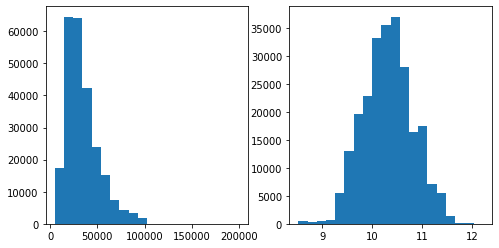

In [ ]:
data['Log1pSalary'] = np.log1p(data['SalaryNormalized']).astype('float32')

plt.figure(figsize=[8, 4])
plt.subplot(1, 2, 1)
plt.hist(data["SalaryNormalized"], bins=20);

plt.subplot(1, 2, 2)
plt.hist(data['Log1pSalary'], bins=20);

In [ ]:
text_columns = ["Title", "FullDescription"]
categorical_columns = ["Category", "Company", "LocationNormalized", "ContractType", "ContractTime"]
TARGET_COLUMN = "Log1pSalary"

data[categorical_columns] = data[categorical_columns].fillna('NaN') # cast missing values to string "NaN"
data[text_columns] = data[text_columns].fillna('NaN')

data.sample(3)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Log1pSalary
117385,69801066,Primary School Teachers,Our recruiting partner is urgently seeking fri...,London South East,South East London,NaN,contract,Tempest Resourcing,Teaching Jobs,From 120 to 190 per day Based on experience an...,37200,totaljobs.com,10.524091
47746,68580443,Senior Drilling Engineer,Senior Drilling Engineer Exciting Location *...,Asia,UK,NaN,NaN,Leap 29,Other/General Jobs,"50,000-74,999 yearly",62499,theladders.co.uk,11.042922
33816,68185827,YEAR **** PRIMARY TEACHER IN HARINGEY,Year **** Primary Teacher in Haringey Long ter...,London,London,NaN,contract,Sanza Online,Teaching Jobs,36400,36400,careerbuilder.com,10.502352


In [ ]:
print("Raw text:")
print(data["FullDescription"][2::100000])

Raw text:
2         Mathematical Modeller / Simulation Analyst / O...
100002    A successful and high achieving specialist sch...
200002    Web Designer  HTML, CSS, JavaScript, Photoshop...
Name: FullDescription, dtype: object


In [ ]:
import nltk

tokenizer = nltk.tokenize.WordPunctTokenizer()
data[text_columns] = data[text_columns].applymap(lambda x: " ".join(tokenizer.tokenize(x.lower())))

In [ ]:
print("Tokenized:")
print(data["FullDescription"][2::100000])
assert data["FullDescription"][2][:50] == 'mathematical modeller / simulation analyst / opera'
assert data["Title"][54321] == 'international digital account manager ( german )'

Tokenized:
2         mathematical modeller / simulation analyst / o...
100002    a successful and high achieving specialist sch...
200002    web designer html , css , javascript , photosh...
Name: FullDescription, dtype: object


In [ ]:
from collections import Counter

token_counts = Counter()
for col in text_columns:
    for line in data[col].values:
        token_counts.update(line.split(" "))

In [ ]:
print("Total unique tokens :", len(token_counts))
print('\n'.join(map(str, token_counts.most_common(n=5))))
print('...')
print('\n'.join(map(str, token_counts.most_common()[-3:])))

assert token_counts.most_common(1)[0][1] in  range(2600000, 2700000)
assert len(token_counts) in range(200000, 210000)
print('Correct!')

Total unique tokens : 202704
('and', 2657388)
('.', 2523216)
(',', 2318606)
('the', 2080994)
('to', 2019884)
...
('stephanietraveltraderecruitmnt', 1)
('ruabon', 1)
('lowehays', 1)
Correct!


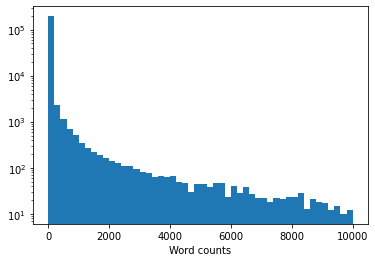

In [ ]:
# Let's see how many words are there for each count
plt.hist(list(token_counts.values()), range=[0, 10**4], bins=50, log=True)
plt.xlabel("Word counts");

In [ ]:
min_count = 10

tokens = sorted(t for t, c in token_counts.items() if c >= min_count)
UNK, PAD = "UNK", "PAD"
tokens = [UNK, PAD] + tokens

In [ ]:
print("Vocabulary size:", len(tokens))
assert type(tokens) == list
assert len(tokens) in range(32000, 35000)
assert 'me' in tokens
assert UNK in tokens
print("Correct!")

Vocabulary size: 34158
Correct!


In [ ]:
token_to_id = {t: i for i, t in enumerate(tokens)}

In [ ]:
assert isinstance(token_to_id, dict)
assert len(token_to_id) == len(tokens)
for tok in tokens:
    assert tokens[token_to_id[tok]] == tok

print("Correct!")

Correct!


In [ ]:
UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

def as_matrix(sequences, max_len=None):
    """ Convert a list of tokens into a matrix with padding """
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
    if not max_len:
        max_len = min(max(map(len, sequences)), max_len or float('inf'))
    
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
    
    return matrix

In [ ]:
print("Lines:")
print('\n'.join(data["Title"][::100000].values), end='\n\n')
print("Matrix:")
print(as_matrix(data["Title"][::100000]))

Lines:
engineering systems analyst
hr assistant
senior ec & i engineer

Matrix:
[[10807 30161  2166     1     1]
 [15020  2844     1     1     1]
 [27645 10201    16 15215 10804]]


In [ ]:
as_matrix(data["Title"]).shape

(244768, 40)

In [ ]:
from sklearn.feature_extraction import DictVectorizer

# we only consider top-1k most frequent companies to minimize memory usage
top_companies, top_counts = zip(*Counter(data['Company']).most_common(1000))
recognized_companies = set(top_companies)
data["Company"] = data["Company"].apply(lambda comp: comp if comp in recognized_companies else "Other")

categorical_vectorizer = DictVectorizer(dtype=np.float32, sparse=False)
categorical_vectorizer.fit(data[categorical_columns].apply(dict, axis=1))

DictVectorizer(dtype=<class 'numpy.float32'>, sparse=False)

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size=0.1, random_state=77)
data_train, data_test = train_test_split(data_train, test_size=0.2, random_state=77)
data_train.index = range(len(data_train))
data_test.index = range(len(data_test))
data_val.index = range(len(data_val))

print("Train size = ", len(data_train))
print("Test size = ", len(data_test))
print("Validation size = ", len(data_val))

Train size =  176232
Test size =  44059
Validation size =  24477


In [ ]:
import torch

def to_tensors(batch, device):
    batch_tensors = dict()
    for key, arr in batch.items():
        if key in ["FullDescription", "Title"]:
            batch_tensors[key] = torch.tensor(arr, device=device, dtype=torch.int64)
        else:
            batch_tensors[key] = torch.tensor(arr, device=device)
    return batch_tensors

def make_batch(data, max_len=None, word_dropout=0, device=torch.device('cpu')):
    """
    Creates a keras-friendly dict from the batch data.
    :param word_dropout: replaces token index with UNK_IX with this probability
    :returns: a dict with {'title' : int64[batch, title_max_len]
    """
    batch = {}
    batch["Title"] = as_matrix(data["Title"].values, max_len)
    batch["FullDescription"] = as_matrix(data["FullDescription"].values, max_len)
    batch['Categorical'] = categorical_vectorizer.transform(data[categorical_columns].apply(dict, axis=1))
    
    if word_dropout != 0:
        batch["FullDescription"] = apply_word_dropout(batch["FullDescription"], 1. - word_dropout)
    
    if TARGET_COLUMN in data.columns:
        batch[TARGET_COLUMN] = data[TARGET_COLUMN].values
    
    return to_tensors(batch, device)

def apply_word_dropout(matrix, keep_prop, replace_with=UNK_IX, pad_ix=PAD_IX,):
    dropout_mask = np.random.choice(2, np.shape(matrix), p=[keep_prop, 1 - keep_prop])
    dropout_mask &= matrix != pad_ix
    return np.choose(dropout_mask, [matrix, np.full_like(matrix, replace_with)])

In [ ]:
make_batch(data_train[:3], max_len=10)

{'Categorical': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 'FullDescription': tensor([[13594,  1122,   158, 13594, 12026,  1120,   169, 24143,   907, 15086],
         [ 8977, 10804,   197, 30464, 29893,    33,  6269,  9826,    65,    82],
         [20601,  6409, 16451,   982, 23329, 15554, 30746,  9083,  2189, 32267]]),
 'Log1pSalary': tensor([10.2810, 10.2922, 10.4631]),
 'Title': tensor([[10114, 30401,     1,     1,     1,     1,     1,     1,     1,     1],
         [ 8977, 10804,   197, 30464, 29893,    33,  6269,  9826,    65,     1],
         [33087,   197,  9262,  2166,     1,     1,     1,     1,     1,     1]])}

In [ ]:
import torch
import torch.nn as nn
import torch.functional as F

In [ ]:
class SalaryPredictor(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.title_encoder = nn.Sequential(
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
      
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.title_encoder(title_embeddings).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.description_encoder(description_embeddings).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model = SalaryPredictor()
batch = make_batch(data_train[:100])
criterion = nn.MSELoss()

dummy_pred = model(batch)
dummy_loss = criterion(dummy_pred, batch[TARGET_COLUMN])
assert dummy_pred.shape == torch.Size([100])
assert len(np.unique(dummy_pred.detach().numpy())) > 20, "model returns suspiciously few unique outputs. Check your initialization"
assert dummy_loss.ndim == 0 and 0. <= dummy_loss <= 250., "make sure you minimize MSE"

In [ ]:
def iterate_minibatches(data, batch_size=256, max_len=None, shuffle=True, cycle=False, **kwargs):
    """ iterates minibatches of data in random order """
    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)
        for start in range(0, len(indices), batch_size):
            batch = make_batch(data.iloc[indices[start : start + batch_size]], max_len=max_len, **kwargs)
            yield batch
        
        if not cycle: break

In [ ]:
import tqdm

BATCH_SIZE = 128
EPOCHS = 3
DEVICE = torch.device('cuda')

In [ ]:
def print_metrics(model, data, batch_size=BATCH_SIZE, name="", **kw):
    squared_error = abs_error = num_samples = 0.0
    model.eval()
    with torch.no_grad():
        for batch in iterate_minibatches(data, batch_size=batch_size, shuffle=False, **kw):
            batch_pred = model(batch)
            squared_error += torch.mean(torch.square(batch_pred - batch[TARGET_COLUMN]))
            abs_error += torch.mean(torch.abs(batch_pred - batch[TARGET_COLUMN]))
            num_samples += len(batch)
    mse = squared_error.detach().cpu().numpy() / num_samples
    mae = abs_error.detach().cpu().numpy() / num_samples
    print("%s results:" % (name or ""))
    print("Mean square error: %.5f" % mse)
    print("Mean absolute error: %.5f" % mae)
    return mse, mae

In [ ]:
def train_model(model, data_train, data_test, optimizer, criterion, epochs = EPOCHS, batch_size=BATCH_SIZE, device=DEVICE):
  loss_stats_train, mse_stats, mae_stats = [], [], []
  for epoch in range(epochs):
    print(f"epoch: {epoch}")
    for i, batch in tqdm.notebook.tqdm(enumerate(
            iterate_minibatches(
                    data_train, 
                    batch_size=batch_size, 
                    device=device)), 
                total=len(data_train) // batch_size
        ):
        model.train()
        pred = model(batch)
        optimizer.zero_grad()
        loss = criterion(pred, batch[TARGET_COLUMN])
        loss.backward()
        optimizer.step()

        if i % 100 == 99:
            print('train_loss', loss.item())
            mse, mae = print_metrics(model, data_val, name='test', batch_size=batch_size, device=device)
            mse_stats.append(mse)
            mae_stats.append(mae)
            loss_stats_train.append(float(loss.item()))
        
  return {"loss_stats_train": loss_stats_train, "mse_stats": mse_stats, "mae_stats": mae_stats}


In [ ]:
model = SalaryPredictor().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model_result = train_model(model, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 11.451539993286133
test results:
Mean square error: 5.15194
Mean absolute error: 1.12621
train_loss 0.43747881054878235
test results:
Mean square error: 0.98079
Mean absolute error: 0.47212
train_loss 0.4553494155406952
test results:
Mean square error: 0.95266
Mean absolute error: 0.46682
train_loss 0.44549357891082764
test results:
Mean square error: 0.94244
Mean absolute error: 0.46598
train_loss 0.3177222013473511
test results:
Mean square error: 0.92729
Mean absolute error: 0.46350
train_loss 0.3495616316795349
test results:
Mean square error: 0.91529
Mean absolute error: 0.46156
train_loss 0.25253647565841675
test results:
Mean square error: 0.92855
Mean absolute error: 0.46618
train_loss 0.3044929504394531
test results:
Mean square error: 0.88208
Mean absolute error: 0.45439
train_loss 0.3047389090061188
test results:
Mean square error: 0.90327
Mean absolute error: 0.46096
train_loss 0.2738022804260254
test results:
Mean square error: 0.86546
Mean absolute error: 0.451

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.262511670589447
test results:
Mean square error: 0.80782
Mean absolute error: 0.43706
train_loss 0.23542290925979614
test results:
Mean square error: 0.77663
Mean absolute error: 0.42834
train_loss 0.2221825122833252
test results:
Mean square error: 0.75504
Mean absolute error: 0.42229
train_loss 0.17206695675849915
test results:
Mean square error: 0.76188
Mean absolute error: 0.42459
train_loss 0.18932843208312988
test results:
Mean square error: 0.75113
Mean absolute error: 0.42162
train_loss 0.21841181814670563
test results:
Mean square error: 0.75830
Mean absolute error: 0.42392
train_loss 0.17414812743663788
test results:
Mean square error: 0.71154
Mean absolute error: 0.41017
train_loss 0.1885746866464615
test results:
Mean square error: 0.71693
Mean absolute error: 0.41193
train_loss 0.1713545322418213
test results:
Mean square error: 0.66085
Mean absolute error: 0.39478
train_loss 0.19870689511299133
test results:
Mean square error: 0.67526
Mean absolute error: 0.3

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.15804782509803772
test results:
Mean square error: 0.60064
Mean absolute error: 0.37616
train_loss 0.20097610354423523
test results:
Mean square error: 0.61751
Mean absolute error: 0.38188
train_loss 0.1393403708934784
test results:
Mean square error: 0.59142
Mean absolute error: 0.37343
train_loss 0.14076152443885803
test results:
Mean square error: 0.59208
Mean absolute error: 0.37373
train_loss 0.12498284131288528
test results:
Mean square error: 0.59266
Mean absolute error: 0.37403
train_loss 0.13926026225090027
test results:
Mean square error: 0.52630
Mean absolute error: 0.35134
train_loss 0.14636823534965515
test results:
Mean square error: 0.56283
Mean absolute error: 0.36420
train_loss 0.13521438837051392
test results:
Mean square error: 0.53986
Mean absolute error: 0.35642
train_loss 0.12674987316131592
test results:
Mean square error: 0.56254
Mean absolute error: 0.36441
train_loss 0.1598464995622635
test results:
Mean square error: 0.49349
Mean absolute error: 

In [ ]:
print_metrics(model, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.45971
Mean absolute error: 0.32785


(0.45971063772837323, 0.32784996430079144)

In [ ]:
def visualize_loss(loss_train):
    plt.plot(loss_train)
    plt.title(f"Loss")
    plt.ylabel('Value')
    plt.xlabel('Iteration')
    plt.show()

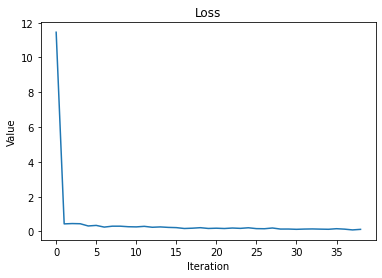

In [ ]:
visualize_loss(model_result["loss_stats_train"])

Из-за большого первого значения данный масштаб не дает никакой полезной информации, поэтому следует исключить из графика то самое первое значение.

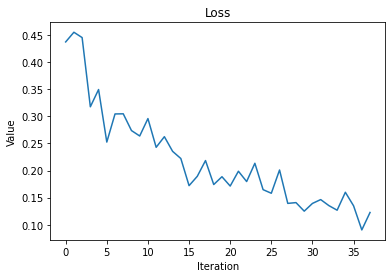

In [ ]:
visualize_loss(model_result["loss_stats_train"][1:])

In [ ]:
def visualize_mse(mse_stats):
    plt.plot(mse_stats)
    plt.title('MSE')
    plt.ylabel('Value')
    plt.xlabel('Iteration')
    plt.show()

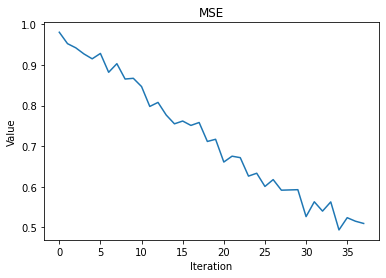

In [ ]:
visualize_mse(model_result["mse_stats"][1:])

In [ ]:
def visualize_mae(mae_stats):
    plt.plot(mae_stats)
    plt.title('MAE')
    plt.ylabel('Value')
    plt.xlabel('Iteration')
    plt.show()

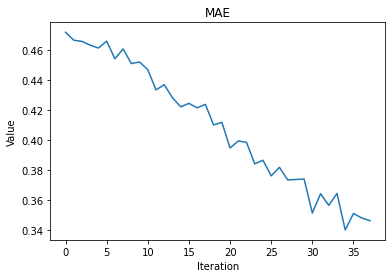

In [ ]:
visualize_mae(model_result["mae_stats"][1:])

**1. Развейте СNN архитектуру (2 балла)**

Добавьте в пайплайн

*   Batch Norm (nn.BatchNorm), LayerNorm...
*   Параллельные сверточные слои. Идея в том, чтобы применить несколько nn.Conv1d к одному и тому же эмбеддингу и после этого сконкатенировать выходные каналы
*   Больше слоев...
*   Добавьте раннюю остановку

На каких примерах модели ведут себя максимально различно/похоже? Предположите с чем это может быть связано. 

Как модель ведет себя в зависимости от количества обучаемых параметров?


***Batch Norm (nn.BatchNorm)***

In [ ]:
class SalaryPredictorWithBN(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.title_encoder = nn.Sequential(
            nn.BatchNorm1d(hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.BatchNorm1d(hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.BatchNorm1d(hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.BatchNorm1d(hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
      
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.title_encoder(title_embeddings).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.description_encoder(description_embeddings).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_bn = SalaryPredictorWithBN().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_bn.parameters(), lr=1e-3)

model_bn_result = train_model(model_bn, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 90.00495910644531
test results:
Mean square error: 23.52167
Mean absolute error: 2.42100
train_loss 76.59053039550781
test results:
Mean square error: 20.55470
Mean absolute error: 2.26180
train_loss 58.6453742980957
test results:
Mean square error: 16.74765
Mean absolute error: 2.04037
train_loss 43.66200637817383
test results:
Mean square error: 12.81034
Mean absolute error: 1.78115
train_loss 27.63655662536621
test results:
Mean square error: 8.96327
Mean absolute error: 1.48435
train_loss 15.812725067138672
test results:
Mean square error: 5.65347
Mean absolute error: 1.16754
train_loss 7.11574649810791
test results:
Mean square error: 2.87337
Mean absolute error: 0.81618
train_loss 3.0547850131988525
test results:
Mean square error: 1.69326
Mean absolute error: 0.60487
train_loss 1.3845657110214233
test results:
Mean square error: 0.91696
Mean absolute error: 0.40869
train_loss 0.8069332838058472
test results:
Mean square error: 0.65080
Mean absolute error: 0.33714
trai

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.36598002910614014
test results:
Mean square error: 0.36024
Mean absolute error: 0.24547
train_loss 0.5247496962547302
test results:
Mean square error: 0.38504
Mean absolute error: 0.25385
train_loss 0.32815787196159363
test results:
Mean square error: 0.38053
Mean absolute error: 0.25292
train_loss 0.2957093417644501
test results:
Mean square error: 0.46232
Mean absolute error: 0.28613
train_loss 0.24749135971069336
test results:
Mean square error: 0.43631
Mean absolute error: 0.27077
train_loss 0.42155033349990845
test results:
Mean square error: 0.39462
Mean absolute error: 0.25639
train_loss 0.4753148853778839
test results:
Mean square error: 0.42299
Mean absolute error: 0.26435
train_loss 0.2134571075439453
test results:
Mean square error: 0.41457
Mean absolute error: 0.26175
train_loss 0.2789873480796814
test results:
Mean square error: 0.41595
Mean absolute error: 0.27298
train_loss 0.274974524974823
test results:
Mean square error: 0.39242
Mean absolute error: 0.256

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.2253744900226593
test results:
Mean square error: 0.25801
Mean absolute error: 0.20604
train_loss 0.2789013385772705
test results:
Mean square error: 0.27008
Mean absolute error: 0.20762
train_loss 0.1712600588798523
test results:
Mean square error: 0.23698
Mean absolute error: 0.19576
train_loss 0.22907771170139313
test results:
Mean square error: 0.19178
Mean absolute error: 0.17571
train_loss 0.3243069648742676
test results:
Mean square error: 0.26414
Mean absolute error: 0.20853
train_loss 0.17618635296821594
test results:
Mean square error: 0.21302
Mean absolute error: 0.18512
train_loss 0.20513002574443817
test results:
Mean square error: 0.22131
Mean absolute error: 0.19069
train_loss 0.21698430180549622
test results:
Mean square error: 0.17920
Mean absolute error: 0.16826
train_loss 0.17303526401519775
test results:
Mean square error: 0.19134
Mean absolute error: 0.17700
train_loss 0.2788720726966858
test results:
Mean square error: 0.22867
Mean absolute error: 0.1

In [ ]:
print_metrics(model_bn, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.16824
Mean absolute error: 0.16154


(0.16824495792388916, 0.16154451171557108)

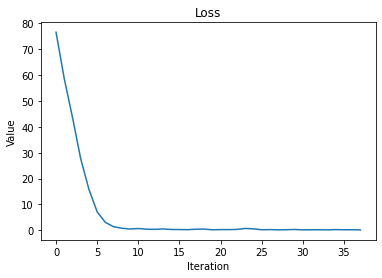

In [ ]:
visualize_loss(model_bn_result["loss_stats_train"][1:])

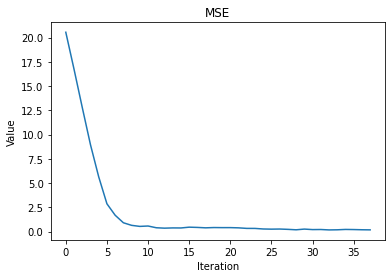

In [ ]:
visualize_mse(model_bn_result["mse_stats"][1:])

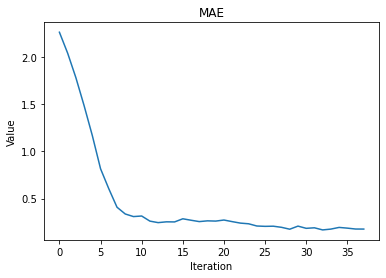

In [ ]:
visualize_mae(model_bn_result["mae_stats"][1:])

***LayerNorm***

В данном случае у меня не получилось воспользоваться nn.LayerNorm, поэтому пришлось использовать nn.GroupNorm, где все каналы попадают в одну группу, что, собственно, эквивалентно LayerNorm.

In [ ]:
class SalaryPredictorWithLN(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.title_encoder = nn.Sequential(
            nn.GroupNorm(1, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.GroupNorm(1, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.GroupNorm(1, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.GroupNorm(1, hid_size * 4),
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
      
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.title_encoder(title_embeddings).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.description_encoder(description_embeddings).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_ln = SalaryPredictorWithLN().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_ln.parameters(), lr=1e-3)

model_ln_result = train_model(model_ln, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 7.536934852600098
test results:
Mean square error: 1.80491
Mean absolute error: 0.65999
train_loss 0.2645246684551239
test results:
Mean square error: 0.06152
Mean absolute error: 0.09934
train_loss 0.21417227387428284
test results:
Mean square error: 0.05080
Mean absolute error: 0.08824
train_loss 0.1610533893108368
test results:
Mean square error: 0.05144
Mean absolute error: 0.08872
train_loss 0.18894457817077637
test results:
Mean square error: 0.05565
Mean absolute error: 0.09284
train_loss 0.12247898429632187
test results:
Mean square error: 0.05254
Mean absolute error: 0.08980
train_loss 0.16936419904232025
test results:
Mean square error: 0.05198
Mean absolute error: 0.08941
train_loss 0.18350587785243988
test results:
Mean square error: 0.05197
Mean absolute error: 0.08950
train_loss 0.13866214454174042
test results:
Mean square error: 0.04961
Mean absolute error: 0.08705
train_loss 0.14116492867469788
test results:
Mean square error: 0.05130
Mean absolute error: 0.

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.13885675370693207
test results:
Mean square error: 0.04887
Mean absolute error: 0.08648
train_loss 0.1337006539106369
test results:
Mean square error: 0.05059
Mean absolute error: 0.08823
train_loss 0.11453995108604431
test results:
Mean square error: 0.05028
Mean absolute error: 0.08805
train_loss 0.12205244600772858
test results:
Mean square error: 0.04214
Mean absolute error: 0.07940
train_loss 0.13667628169059753
test results:
Mean square error: 0.04896
Mean absolute error: 0.08682
train_loss 0.10623110830783844
test results:
Mean square error: 0.04515
Mean absolute error: 0.08289
train_loss 0.138136625289917
test results:
Mean square error: 0.05163
Mean absolute error: 0.08954
train_loss 0.13479897379875183
test results:
Mean square error: 0.04842
Mean absolute error: 0.08639
train_loss 0.08873589336872101
test results:
Mean square error: 0.04744
Mean absolute error: 0.08583
train_loss 0.12912455201148987
test results:
Mean square error: 0.04823
Mean absolute error: 0

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.10594228655099869
test results:
Mean square error: 0.04705
Mean absolute error: 0.08562
train_loss 0.12927289307117462
test results:
Mean square error: 0.04661
Mean absolute error: 0.08524
train_loss 0.09990794956684113
test results:
Mean square error: 0.04565
Mean absolute error: 0.08411
train_loss 0.1095338985323906
test results:
Mean square error: 0.04500
Mean absolute error: 0.08370
train_loss 0.09928777813911438
test results:
Mean square error: 0.04286
Mean absolute error: 0.08125
train_loss 0.14146539568901062
test results:
Mean square error: 0.04086
Mean absolute error: 0.07909
train_loss 0.10159803926944733
test results:
Mean square error: 0.04363
Mean absolute error: 0.08208
train_loss 0.09367894381284714
test results:
Mean square error: 0.04139
Mean absolute error: 0.07964
train_loss 0.10635356605052948
test results:
Mean square error: 0.03749
Mean absolute error: 0.07515
train_loss 0.11476000398397446
test results:
Mean square error: 0.04537
Mean absolute error:

In [ ]:
print_metrics(model_ln, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.04048
Mean absolute error: 0.07911


(0.04047896464665731, 0.07910579442977905)

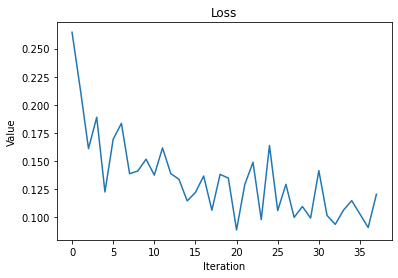

In [ ]:
visualize_loss(model_ln_result["loss_stats_train"][1:])

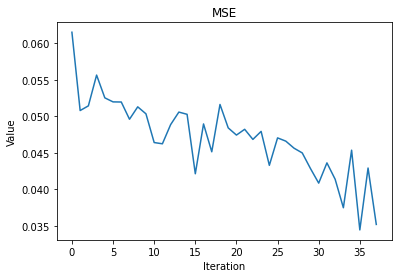

In [ ]:
visualize_mse(model_ln_result["mse_stats"][1:])

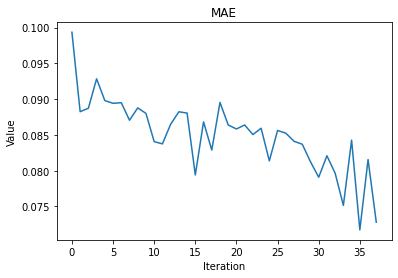

In [ ]:
visualize_mae(model_ln_result["mae_stats"][1:])

***GroupNorm***

In [ ]:
class SalaryPredictorWithGN(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.title_encoder = nn.Sequential(
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.GroupNorm(8, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size * 4),
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
      
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.title_encoder(title_embeddings).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.description_encoder(description_embeddings).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_gn = SalaryPredictorWithGN().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_gn.parameters(), lr=1e-3)

model_gn_result = train_model(model_gn, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 6.654897212982178
test results:
Mean square error: 1.60461
Mean absolute error: 0.62090
train_loss 0.19604170322418213
test results:
Mean square error: 0.06248
Mean absolute error: 0.10036
train_loss 0.2726380228996277
test results:
Mean square error: 0.06089
Mean absolute error: 0.09900
train_loss 0.18529775738716125
test results:
Mean square error: 0.05808
Mean absolute error: 0.09660
train_loss 0.21011137962341309
test results:
Mean square error: 0.05573
Mean absolute error: 0.09455
train_loss 0.20765574276447296
test results:
Mean square error: 0.05329
Mean absolute error: 0.09231
train_loss 0.141813725233078
test results:
Mean square error: 0.05053
Mean absolute error: 0.08990
train_loss 0.2035234272480011
test results:
Mean square error: 0.04841
Mean absolute error: 0.08762
train_loss 0.15212425589561462
test results:
Mean square error: 0.04732
Mean absolute error: 0.08645
train_loss 0.2601756155490875
test results:
Mean square error: 0.04616
Mean absolute error: 0.085

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.15984751284122467
test results:
Mean square error: 0.04311
Mean absolute error: 0.08182
train_loss 0.15544529259204865
test results:
Mean square error: 0.04248
Mean absolute error: 0.08139
train_loss 0.1619812250137329
test results:
Mean square error: 0.04278
Mean absolute error: 0.08202
train_loss 0.1821463257074356
test results:
Mean square error: 0.04142
Mean absolute error: 0.08032
train_loss 0.16269347071647644
test results:
Mean square error: 0.04088
Mean absolute error: 0.07963
train_loss 0.17776420712471008
test results:
Mean square error: 0.04143
Mean absolute error: 0.08050
train_loss 0.13470453023910522
test results:
Mean square error: 0.04061
Mean absolute error: 0.07940
train_loss 0.16313539445400238
test results:
Mean square error: 0.04035
Mean absolute error: 0.07905
train_loss 0.1755475401878357
test results:
Mean square error: 0.03928
Mean absolute error: 0.07772
train_loss 0.1672700047492981
test results:
Mean square error: 0.03911
Mean absolute error: 0.

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.14526495337486267
test results:
Mean square error: 0.03682
Mean absolute error: 0.07479
train_loss 0.16073639690876007
test results:
Mean square error: 0.03663
Mean absolute error: 0.07449
train_loss 0.11657556146383286
test results:
Mean square error: 0.03641
Mean absolute error: 0.07423
train_loss 0.1525164693593979
test results:
Mean square error: 0.03599
Mean absolute error: 0.07383
train_loss 0.12337610125541687
test results:
Mean square error: 0.03560
Mean absolute error: 0.07321
train_loss 0.1293831467628479
test results:
Mean square error: 0.03580
Mean absolute error: 0.07389
train_loss 0.13713139295578003
test results:
Mean square error: 0.03534
Mean absolute error: 0.07320
train_loss 0.12047341465950012
test results:
Mean square error: 0.03477
Mean absolute error: 0.07258
train_loss 0.12507197260856628
test results:
Mean square error: 0.03388
Mean absolute error: 0.07119
train_loss 0.12752050161361694
test results:
Mean square error: 0.03328
Mean absolute error: 

In [ ]:
print_metrics(model_gn, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.03168
Mean absolute error: 0.06865


(0.03168036788702011, 0.06864776213963826)

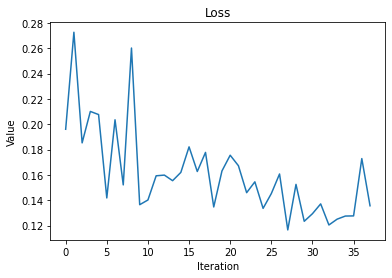

In [ ]:
visualize_loss(model_gn_result["loss_stats_train"][1:])

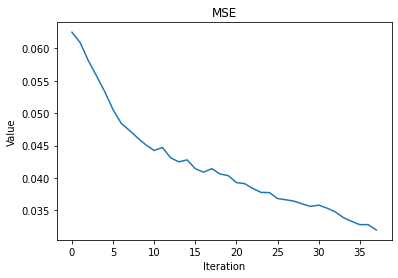

In [ ]:
visualize_mse(model_gn_result["mse_stats"][1:])

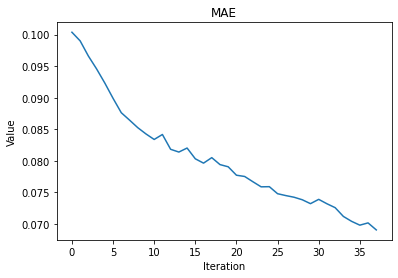

In [ ]:
visualize_mae(model_gn_result["mae_stats"][1:])

***Параллельные сверточные слои***

In [ ]:
class SalaryPredictorWithPCL(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.title_encoder1 = nn.Sequential(
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.title_encoder2 = nn.Sequential(
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder1 = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder2 = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.GroupNorm(8, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size * 4),
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
      
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.title_encoder1(title_embeddings).squeeze() + self.title_encoder2(title_embeddings).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.description_encoder1(description_embeddings).squeeze() + self.description_encoder2(description_embeddings).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_pcl = SalaryPredictorWithPCL().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_pcl.parameters(), lr=1e-3)

model_pcl_result = train_model(model_pcl, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 7.659126281738281
test results:
Mean square error: 1.85822
Mean absolute error: 0.67046
train_loss 0.195229172706604
test results:
Mean square error: 0.05747
Mean absolute error: 0.09620
train_loss 0.19758468866348267
test results:
Mean square error: 0.05593
Mean absolute error: 0.09486
train_loss 0.2077745497226715
test results:
Mean square error: 0.05496
Mean absolute error: 0.09386
train_loss 0.2134699821472168
test results:
Mean square error: 0.05391
Mean absolute error: 0.09302
train_loss 0.20432798564434052
test results:
Mean square error: 0.05237
Mean absolute error: 0.09153
train_loss 0.1788758486509323
test results:
Mean square error: 0.04879
Mean absolute error: 0.08812
train_loss 0.2243865430355072
test results:
Mean square error: 0.04685
Mean absolute error: 0.08591
train_loss 0.17403922975063324
test results:
Mean square error: 0.04565
Mean absolute error: 0.08444
train_loss 0.20259606838226318
test results:
Mean square error: 0.04526
Mean absolute error: 0.0845

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.16311965882778168
test results:
Mean square error: 0.04215
Mean absolute error: 0.08090
train_loss 0.1353723108768463
test results:
Mean square error: 0.04070
Mean absolute error: 0.07910
train_loss 0.1859269142150879
test results:
Mean square error: 0.04049
Mean absolute error: 0.07904
train_loss 0.18486081063747406
test results:
Mean square error: 0.04087
Mean absolute error: 0.07935
train_loss 0.19054847955703735
test results:
Mean square error: 0.04038
Mean absolute error: 0.07909
train_loss 0.13913390040397644
test results:
Mean square error: 0.03990
Mean absolute error: 0.07845
train_loss 0.15915998816490173
test results:
Mean square error: 0.03978
Mean absolute error: 0.07846
train_loss 0.17025023698806763
test results:
Mean square error: 0.03871
Mean absolute error: 0.07682
train_loss 0.15684258937835693
test results:
Mean square error: 0.03828
Mean absolute error: 0.07618
train_loss 0.24253720045089722
test results:
Mean square error: 0.03810
Mean absolute error: 

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.16294628381729126
test results:
Mean square error: 0.03554
Mean absolute error: 0.07331
train_loss 0.1537099927663803
test results:
Mean square error: 0.03501
Mean absolute error: 0.07272
train_loss 0.12516522407531738
test results:
Mean square error: 0.03438
Mean absolute error: 0.07178
train_loss 0.1577037125825882
test results:
Mean square error: 0.03384
Mean absolute error: 0.07118
train_loss 0.15143389999866486
test results:
Mean square error: 0.03394
Mean absolute error: 0.07158
train_loss 0.1563951075077057
test results:
Mean square error: 0.03305
Mean absolute error: 0.07047
train_loss 0.12930580973625183
test results:
Mean square error: 0.03285
Mean absolute error: 0.06980
train_loss 0.11919046193361282
test results:
Mean square error: 0.03254
Mean absolute error: 0.06990
train_loss 0.17253047227859497
test results:
Mean square error: 0.03181
Mean absolute error: 0.06889
train_loss 0.10515354573726654
test results:
Mean square error: 0.03177
Mean absolute error: 0

In [ ]:
print_metrics(model_pcl, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.03014
Mean absolute error: 0.06697


(0.03013595441977183, 0.06696938474973042)

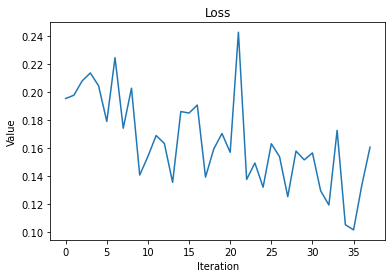

In [ ]:
visualize_loss(model_pcl_result["loss_stats_train"][1:])

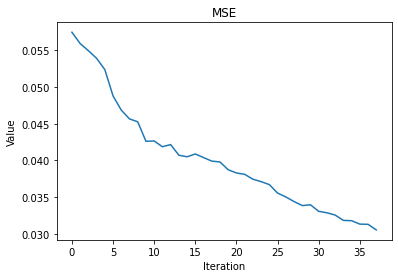

In [ ]:
visualize_mse(model_pcl_result["mse_stats"][1:])

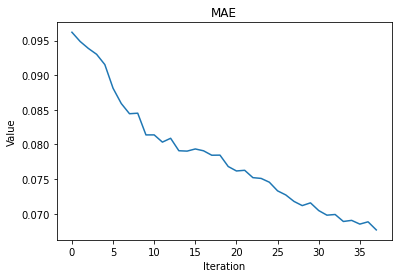

In [ ]:
visualize_mae(model_pcl_result["mae_stats"][1:])

***Больше слоев***

In [ ]:
class SalaryPredictorMoreLayers(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.title_encoder1 = nn.Sequential(
            nn.BatchNorm1d(hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.BatchNorm1d(hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.title_encoder2 = nn.Sequential(
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.15),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder1 = nn.Sequential(
            nn.BatchNorm1d(hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.BatchNorm1d(hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder2 = nn.Sequential(
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder1 = nn.Sequential(
            nn.BatchNorm1d(n_cat_features),
            nn.Linear(n_cat_features, hid_size * 4),
            nn.BatchNorm1d(hid_size * 4),
            nn.Linear(hid_size * 4, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.categorical_encoder2 = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 4),
            nn.GroupNorm(hid_size, hid_size * 4),
            nn.Linear(hid_size * 4, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.BatchNorm1d(hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
      
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.title_encoder1(title_embeddings).squeeze() + self.title_encoder2(title_embeddings).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.description_encoder1(description_embeddings).squeeze() + self.description_encoder2(description_embeddings).squeeze()

        categorical_features = self.categorical_encoder1(batch['Categorical']) + self.categorical_encoder2(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_ml = SalaryPredictorMoreLayers().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_ml.parameters(), lr=1e-3)

model_ml_result = train_model(model_ml, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 97.59381103515625
test results:
Mean square error: 23.88503
Mean absolute error: 2.43667
train_loss 82.17386627197266
test results:
Mean square error: 20.73656
Mean absolute error: 2.26788
train_loss 64.28947448730469
test results:
Mean square error: 16.35424
Mean absolute error: 2.01018
train_loss 45.65342712402344
test results:
Mean square error: 12.59057
Mean absolute error: 1.75909
train_loss 30.156827926635742
test results:
Mean square error: 8.61130
Mean absolute error: 1.44217
train_loss 16.89480972290039
test results:
Mean square error: 5.49498
Mean absolute error: 1.13853
train_loss 7.92682409286499
test results:
Mean square error: 2.97686
Mean absolute error: 0.80769
train_loss 3.0715231895446777
test results:
Mean square error: 1.61794
Mean absolute error: 0.56436
train_loss 1.3125829696655273
test results:
Mean square error: 1.24849
Mean absolute error: 0.48250
train_loss 0.5554089546203613
test results:
Mean square error: 0.72699
Mean absolute error: 0.33148
tra

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.23315268754959106
test results:
Mean square error: 0.34446
Mean absolute error: 0.16985
train_loss 0.2531258761882782
test results:
Mean square error: 0.39266
Mean absolute error: 0.17768
train_loss 0.2008744478225708
test results:
Mean square error: 0.36271
Mean absolute error: 0.17347
train_loss 0.23456737399101257
test results:
Mean square error: 0.33830
Mean absolute error: 0.16528
train_loss 0.3638860583305359
test results:
Mean square error: 0.34282
Mean absolute error: 0.16306
train_loss 0.2678007483482361
test results:
Mean square error: 0.43526
Mean absolute error: 0.19050
train_loss 0.224375918507576
test results:
Mean square error: 0.38207
Mean absolute error: 0.17479
train_loss 0.2849613428115845
test results:
Mean square error: 0.36176
Mean absolute error: 0.16425
train_loss 0.283496618270874
test results:
Mean square error: 0.37408
Mean absolute error: 0.16699
train_loss 0.1841777265071869
test results:
Mean square error: 0.35760
Mean absolute error: 0.16322


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.22581011056900024
test results:
Mean square error: 0.43522
Mean absolute error: 0.17741
train_loss 0.28650325536727905
test results:
Mean square error: 0.50604
Mean absolute error: 0.21223
train_loss 0.16701173782348633
test results:
Mean square error: 0.46231
Mean absolute error: 0.18163
train_loss 0.2546636760234833
test results:
Mean square error: 0.40996
Mean absolute error: 0.16791
train_loss 0.15751832723617554
test results:
Mean square error: 0.41487
Mean absolute error: 0.17145
train_loss 0.15421707928180695
test results:
Mean square error: 0.43243
Mean absolute error: 0.17815
train_loss 0.17773450911045074
test results:
Mean square error: 0.42194
Mean absolute error: 0.16947
train_loss 0.2058376669883728
test results:
Mean square error: 0.44091
Mean absolute error: 0.17478
train_loss 0.1870984584093094
test results:
Mean square error: 0.44341
Mean absolute error: 0.18780
train_loss 0.21064527332782745
test results:
Mean square error: 0.41278
Mean absolute error: 0

In [ ]:
print_metrics(model_ml, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.45070
Mean absolute error: 0.18001


(0.4506985346476237, 0.18000972270965576)

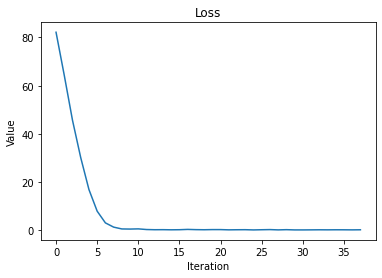

In [ ]:
visualize_loss(model_ml_result["loss_stats_train"][1:])

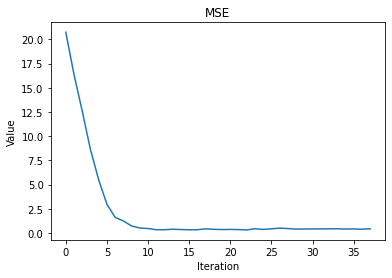

In [ ]:
visualize_mse(model_ml_result["mse_stats"][1:])

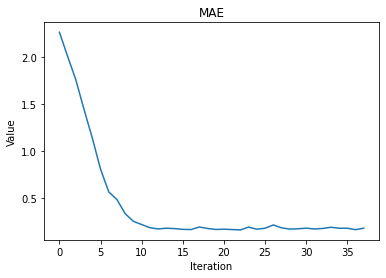

In [ ]:
visualize_mae(model_ml_result["mae_stats"][1:])

***Ранняя остановка***

In [ ]:
def train_model(model, data_train, data_test, optimizer, criterion, epochs = EPOCHS, batch_size=BATCH_SIZE, device=DEVICE):
  best_loss = np.inf
  loss_stats_train, mse_stats, mae_stats = [], [], []
  for epoch in range(epochs):
    print(f"epoch: {epoch}")
    for i, batch in tqdm.notebook.tqdm(enumerate(
            iterate_minibatches(
                    data_train, 
                    batch_size=batch_size, 
                    device=device)), 
                total=len(data_train) // batch_size
        ):
        model.train()
        pred = model(batch)
        optimizer.zero_grad()
        loss = criterion(pred, batch[TARGET_COLUMN])
        loss.backward()
        optimizer.step()

        if i % 100 == 99:
            print('train_loss', loss.item())
            mse, mae = print_metrics(model, data_val, name='test', batch_size=batch_size, device=device)
            mse_stats.append(mse)
            mae_stats.append(mae)
            loss_stats_train.append(float(loss.item()))
            
    if float(loss.item()) < best_loss:
          best_loss = float(loss.item())
    else:
          break
        
  return {"loss_stats_train": loss_stats_train, "mse_stats": mse_stats, "mae_stats": mae_stats}


In [ ]:
model_stop = SalaryPredictorMoreLayers().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_stop.parameters(), lr=1e-3)

model_stop_result = train_model(model_stop, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 105.22313690185547
test results:
Mean square error: 27.60635
Mean absolute error: 2.62151
train_loss 92.84343719482422
test results:
Mean square error: 23.56470
Mean absolute error: 2.41931
train_loss 80.02046203613281
test results:
Mean square error: 19.52109
Mean absolute error: 2.19693
train_loss 67.961669921875
test results:
Mean square error: 16.75856
Mean absolute error: 2.03414
train_loss 51.78656005859375
test results:
Mean square error: 12.92857
Mean absolute error: 1.77758
train_loss 37.75697326660156
test results:
Mean square error: 9.72442
Mean absolute error: 1.52728
train_loss 23.45857810974121
test results:
Mean square error: 7.24430
Mean absolute error: 1.31138
train_loss 13.304996490478516
test results:
Mean square error: 4.71949
Mean absolute error: 1.03321
train_loss 7.183584213256836
test results:
Mean square error: 2.86510
Mean absolute error: 0.78749
train_loss 4.095552444458008
test results:
Mean square error: 1.75110
Mean absolute error: 0.56579
train

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.6388223171234131
test results:
Mean square error: 0.63431
Mean absolute error: 0.25412
train_loss 0.4495062530040741
test results:
Mean square error: 0.59064
Mean absolute error: 0.25217
train_loss 0.431395947933197
test results:
Mean square error: 0.90749
Mean absolute error: 0.28074
train_loss 0.49560683965682983
test results:
Mean square error: 0.61668
Mean absolute error: 0.23167
train_loss 0.3880925178527832
test results:
Mean square error: 0.86318
Mean absolute error: 0.24265
train_loss 0.46813541650772095
test results:
Mean square error: 0.56721
Mean absolute error: 0.21117
train_loss 0.30635395646095276
test results:
Mean square error: 0.63800
Mean absolute error: 0.22248
train_loss 0.7296024560928345
test results:
Mean square error: 0.52042
Mean absolute error: 0.21375
train_loss 0.60502690076828
test results:
Mean square error: 0.48939
Mean absolute error: 0.20045
train_loss 0.5519794821739197
test results:
Mean square error: 0.66160
Mean absolute error: 0.21953


In [ ]:
print_metrics(model_stop, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.68161
Mean absolute error: 0.19853


(0.6816105842590332, 0.19852699836095175)

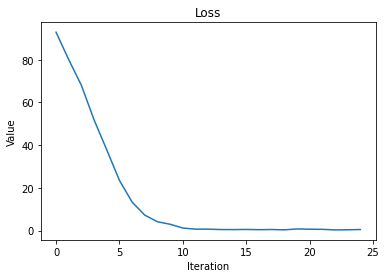

In [ ]:
visualize_loss(model_stop_result["loss_stats_train"][1:])

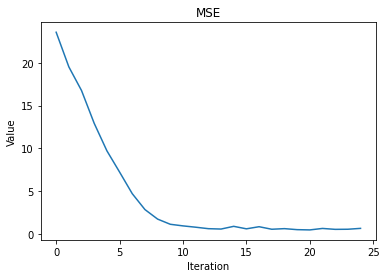

In [ ]:
visualize_mse(model_stop_result["mse_stats"][1:])

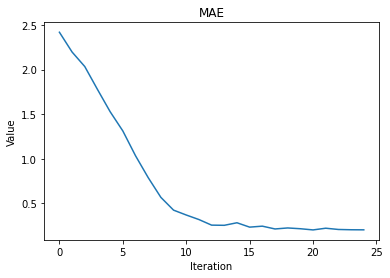

In [ ]:
visualize_mae(model_stop_result["mae_stats"][1:])

**Итог по заданию 1**

Наилучший результат показала модель с параллельными сверточными слоями + GroupNorm.

Mean square error: 0.03014

Mean absolute error: 0.06697

**2. Pooling слои стандартные (1 балла)**

*   Опишите своими словами как работает Pooling слой.

Основной задачей pooling слоя является снижение размерности входного тензора, что позволяет сократить количество дальнейших вычислений.Работает это следующим образом: по тензору проходим определеннным "окном" и вычленяем необходимую нам информацию(максимум, минимум, среднее значение по окну).

*   Взять максимум по временной компоненте (незавимисо для каждой фичи)

In [ ]:
class SalaryPredictorMaxPool(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.title_encoder = nn.Sequential(
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.GroupNorm(8, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size * 4),
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
      
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.title_encoder(title_embeddings).max(dim=2)[0]

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.description_encoder(description_embeddings).max(dim=2)[0]

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_mp = SalaryPredictorMaxPool().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_mp.parameters(), lr=1e-3)

model_mp_result = train_model(model_mp, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 28.562347412109375
test results:
Mean square error: 6.95105
Mean absolute error: 1.31244
train_loss 0.23563361167907715
test results:
Mean square error: 0.06168
Mean absolute error: 0.09975
train_loss 0.2022165060043335
test results:
Mean square error: 0.06093
Mean absolute error: 0.09889
train_loss 0.22715213894844055
test results:
Mean square error: 0.06103
Mean absolute error: 0.09861
train_loss 0.2145734578371048
test results:
Mean square error: 0.05988
Mean absolute error: 0.09789
train_loss 0.23385724425315857
test results:
Mean square error: 0.05439
Mean absolute error: 0.09320
train_loss 0.18369363248348236
test results:
Mean square error: 0.05041
Mean absolute error: 0.08962
train_loss 0.1728658378124237
test results:
Mean square error: 0.04835
Mean absolute error: 0.08753
train_loss 0.1758710741996765
test results:
Mean square error: 0.04696
Mean absolute error: 0.08598
train_loss 0.24203349649906158
test results:
Mean square error: 0.04585
Mean absolute error: 0.0

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.14346250891685486
test results:
Mean square error: 0.04198
Mean absolute error: 0.08060
train_loss 0.16284000873565674
test results:
Mean square error: 0.04114
Mean absolute error: 0.07940
train_loss 0.16519992053508759
test results:
Mean square error: 0.04012
Mean absolute error: 0.07827
train_loss 0.16198459267616272
test results:
Mean square error: 0.03918
Mean absolute error: 0.07721
train_loss 0.14107531309127808
test results:
Mean square error: 0.03844
Mean absolute error: 0.07636
train_loss 0.10761874169111252
test results:
Mean square error: 0.03756
Mean absolute error: 0.07538
train_loss 0.1409989893436432
test results:
Mean square error: 0.03716
Mean absolute error: 0.07496
train_loss 0.14520558714866638
test results:
Mean square error: 0.03659
Mean absolute error: 0.07406
train_loss 0.13305732607841492
test results:
Mean square error: 0.03621
Mean absolute error: 0.07348
train_loss 0.13880935311317444
test results:
Mean square error: 0.03533
Mean absolute error:

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.15800891816616058
test results:
Mean square error: 0.03391
Mean absolute error: 0.07143
train_loss 0.11712659150362015
test results:
Mean square error: 0.03309
Mean absolute error: 0.07032
train_loss 0.12523576617240906
test results:
Mean square error: 0.03283
Mean absolute error: 0.06974
train_loss 0.12869156897068024
test results:
Mean square error: 0.03244
Mean absolute error: 0.06941
train_loss 0.14551633596420288
test results:
Mean square error: 0.03238
Mean absolute error: 0.06909
train_loss 0.12541034817695618
test results:
Mean square error: 0.03222
Mean absolute error: 0.06957
train_loss 0.12324264645576477
test results:
Mean square error: 0.03159
Mean absolute error: 0.06815
train_loss 0.13682377338409424
test results:
Mean square error: 0.03153
Mean absolute error: 0.06798
train_loss 0.10377601534128189
test results:
Mean square error: 0.03049
Mean absolute error: 0.06698
train_loss 0.11481922119855881
test results:
Mean square error: 0.03034
Mean absolute error

In [ ]:
print_metrics(model_mp, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.02906
Mean absolute error: 0.06523


(0.029060860474904377, 0.06522621711095174)

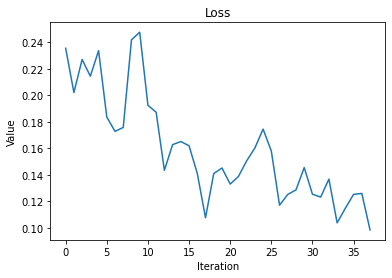

In [ ]:
visualize_loss(model_mp_result["loss_stats_train"][1:])

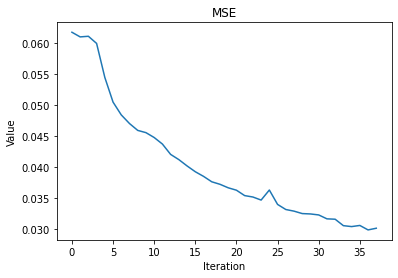

In [ ]:
visualize_mse(model_mp_result["mse_stats"][1:])

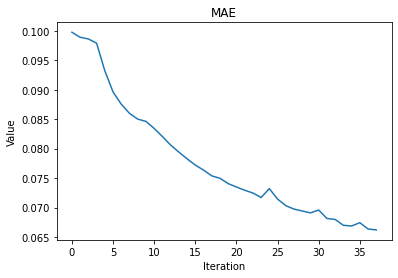

In [ ]:
visualize_mae(model_mp_result["mae_stats"][1:])

*   Взять среднее по временной компоненте (исключая PAD символы)

In [ ]:
class SalaryPredictorMeanPool(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.title_encoder = nn.Sequential(
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.GroupNorm(8, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size * 4),
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
      
    def mean(self, batch):
        with torch.no_grad():
            return batch.sum(axis=2) / (batch.sum(axis=1) > 0).sum(axis=1).view(-1,1).float()

        
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.mean(self.title_encoder(title_embeddings))

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.mean(self.description_encoder(description_embeddings))

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_mean = SalaryPredictorMeanPool().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_mean.parameters(), lr=1e-3)

model_mean_result = train_model(model_mean, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 19.462247848510742
test results:
Mean square error: 4.56502
Mean absolute error: 1.05512
train_loss 0.7679026126861572
test results:
Mean square error: 0.19752
Mean absolute error: 0.17856
train_loss 0.8576267957687378
test results:
Mean square error: 0.16648
Mean absolute error: 0.16251
train_loss 0.6554371118545532
test results:
Mean square error: 0.14647
Mean absolute error: 0.15249
train_loss 0.4619523286819458
test results:
Mean square error: 0.12776
Mean absolute error: 0.14178
train_loss 0.5357258319854736
test results:
Mean square error: 0.11533
Mean absolute error: 0.13457
train_loss 0.4029969274997711
test results:
Mean square error: 0.10534
Mean absolute error: 0.12865
train_loss 0.3603125214576721
test results:
Mean square error: 0.09722
Mean absolute error: 0.12366
train_loss 0.33287161588668823
test results:
Mean square error: 0.08671
Mean absolute error: 0.11622
train_loss 0.30490267276763916
test results:
Mean square error: 0.08054
Mean absolute error: 0.1123

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.2250298410654068
test results:
Mean square error: 0.05984
Mean absolute error: 0.09593
train_loss 0.2365838587284088
test results:
Mean square error: 0.05749
Mean absolute error: 0.09431
train_loss 0.20369336009025574
test results:
Mean square error: 0.05630
Mean absolute error: 0.09379
train_loss 0.1762666255235672
test results:
Mean square error: 0.05356
Mean absolute error: 0.09062
train_loss 0.19502317905426025
test results:
Mean square error: 0.05287
Mean absolute error: 0.09055
train_loss 0.19259902834892273
test results:
Mean square error: 0.05147
Mean absolute error: 0.08871
train_loss 0.21716821193695068
test results:
Mean square error: 0.05091
Mean absolute error: 0.08920
train_loss 0.17914026975631714
test results:
Mean square error: 0.04859
Mean absolute error: 0.08651
train_loss 0.2668411135673523
test results:
Mean square error: 0.04760
Mean absolute error: 0.08515
train_loss 0.2518077492713928
test results:
Mean square error: 0.04800
Mean absolute error: 0.0

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.1593456268310547
test results:
Mean square error: 0.04562
Mean absolute error: 0.08416
train_loss 0.150255024433136
test results:
Mean square error: 0.04399
Mean absolute error: 0.08225
train_loss 0.18367072939872742
test results:
Mean square error: 0.04325
Mean absolute error: 0.08120
train_loss 0.17284661531448364
test results:
Mean square error: 0.04401
Mean absolute error: 0.08246
train_loss 0.17221909761428833
test results:
Mean square error: 0.04294
Mean absolute error: 0.08123
train_loss 0.19272668659687042
test results:
Mean square error: 0.04398
Mean absolute error: 0.08248
train_loss 0.1546340435743332
test results:
Mean square error: 0.04201
Mean absolute error: 0.08029
train_loss 0.15558944642543793
test results:
Mean square error: 0.04156
Mean absolute error: 0.07931
train_loss 0.1556655764579773
test results:
Mean square error: 0.04128
Mean absolute error: 0.07950
train_loss 0.1514946073293686
test results:
Mean square error: 0.04121
Mean absolute error: 0.07

In [ ]:
print_metrics(model_mean, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.04008
Mean absolute error: 0.07850


(0.04008125513792038, 0.07849657038847606)

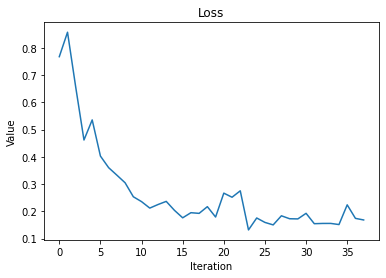

In [ ]:
visualize_loss(model_mean_result["loss_stats_train"][1:])

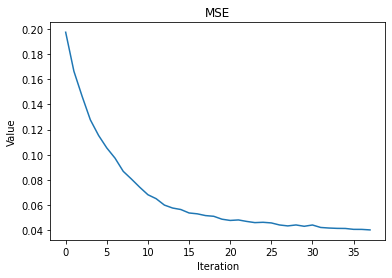

In [ ]:
visualize_mse(model_mean_result["mse_stats"][1:])

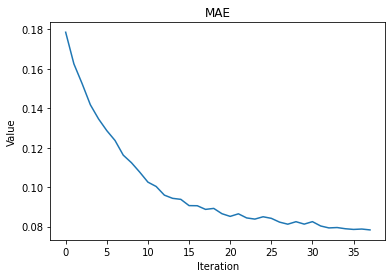

In [ ]:
visualize_mae(model_mean_result["mae_stats"][1:])

**Итог по заданию 2**

Наилучший результат показала модель с Max Pooling.

val results:

Mean square error: 0.02906

Mean absolute error: 0.06523

**3. Используйте предобученные эмбеддинги (2 балла)**

*   Загрузите предобученные эмбеддинги с помощью gensim.downloader.load

In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


*   Используйте метод [from_pretrained](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) слоя torch.nn.Embedding для инициализации эмбеддингов с помощью предобученных весов. Можете попбровать несколько типов предобученных эмбеддингов.

In [ ]:
import gensim

id_to_tocken = {value:key for key, value in token_to_id.items()}

weight = torch.zeros(len(token_to_id)+1, wv.vector_size)

for i in range(len(token_to_id)+1):
    try:
        weight[i, :] = torch.from_numpy(wv.get_vector(id_to_tocken[i]))
    except:
        continue
embedding = nn.Embedding.from_pretrained(weight, freeze=False)
embedding_freeze = nn.Embedding.from_pretrained(weight, freeze=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  if __name__ == '__main__':


*   Проведите эксперементы с обучаемыми/замороженными весами эмбеддингов.
Используйте одни и те же эмбеддинги для Title и FullDescription.

In [ ]:
class SalaryPredictorEmb(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=300):
        super().__init__()
        self.embedder = embedding
        self.title_encoder = nn.Sequential(
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.BatchNorm1d(hid_size),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.BatchNorm1d(hid_size),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.BatchNorm1d(hid_size*2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.BatchNorm1d(hid_size*2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.BatchNorm1d(hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
        
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.title_encoder(title_embeddings).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.description_encoder(description_embeddings).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_emb = SalaryPredictorEmb().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_emb.parameters(), lr=1e-3)

model_emb_result = train_model(model_emb, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.5072625875473022
test results:
Mean square error: 0.53547
Mean absolute error: 0.33027
train_loss 0.1776893138885498
test results:
Mean square error: 0.11910
Mean absolute error: 0.13843
train_loss 0.11997953057289124
test results:
Mean square error: 0.08343
Mean absolute error: 0.12031
train_loss 0.1218370720744133
test results:
Mean square error: 0.04372
Mean absolute error: 0.08333
train_loss 0.10067015141248703
test results:
Mean square error: 0.04031
Mean absolute error: 0.07972
train_loss 0.09222059696912766
test results:
Mean square error: 0.02839
Mean absolute error: 0.06512
train_loss 0.0896395742893219
test results:
Mean square error: 0.05644
Mean absolute error: 0.09839
train_loss 0.08375824987888336
test results:
Mean square error: 0.06393
Mean absolute error: 0.10617
train_loss 0.13953877985477448
test results:
Mean square error: 0.11828
Mean absolute error: 0.15564
train_loss 0.10176127403974533
test results:
Mean square error: 0.04652
Mean absolute error: 0.

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.0891023501753807
test results:
Mean square error: 0.04313
Mean absolute error: 0.08509
train_loss 0.07287245988845825
test results:
Mean square error: 0.04022
Mean absolute error: 0.08056
train_loss 0.05078331008553505
test results:
Mean square error: 0.03775
Mean absolute error: 0.07620
train_loss 0.11759091168642044
test results:
Mean square error: 0.10847
Mean absolute error: 0.14785
train_loss 0.09178292751312256
test results:
Mean square error: 0.03246
Mean absolute error: 0.07122
train_loss 0.06890133768320084
test results:
Mean square error: 0.02284
Mean absolute error: 0.05767
train_loss 0.1503107249736786
test results:
Mean square error: 0.08821
Mean absolute error: 0.13309
train_loss 0.05568233132362366
test results:
Mean square error: 0.02016
Mean absolute error: 0.05384
train_loss 0.09042786061763763
test results:
Mean square error: 0.05491
Mean absolute error: 0.09452
train_loss 0.08892187476158142
test results:
Mean square error: 0.03129
Mean absolute error: 

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.04872368276119232
test results:
Mean square error: 0.03644
Mean absolute error: 0.07861
train_loss 0.0631643533706665
test results:
Mean square error: 0.03441
Mean absolute error: 0.07569
train_loss 0.05385373905301094
test results:
Mean square error: 0.05251
Mean absolute error: 0.09806
train_loss 0.06250481307506561
test results:
Mean square error: 0.02252
Mean absolute error: 0.05765
train_loss 0.06848534941673279
test results:
Mean square error: 0.05189
Mean absolute error: 0.09911
train_loss 0.051508236676454544
test results:
Mean square error: 0.06548
Mean absolute error: 0.11225
train_loss 0.050801362842321396
test results:
Mean square error: 0.05629
Mean absolute error: 0.09999
train_loss 0.06258413195610046
test results:
Mean square error: 0.01784
Mean absolute error: 0.05006
train_loss 0.06063951179385185
test results:
Mean square error: 0.01710
Mean absolute error: 0.04942
train_loss 0.07716405391693115
test results:
Mean square error: 0.06036
Mean absolute erro

In [ ]:
print_metrics(model_emb, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.07029
Mean absolute error: 0.11640


(0.07028638819853465, 0.11640111605326335)

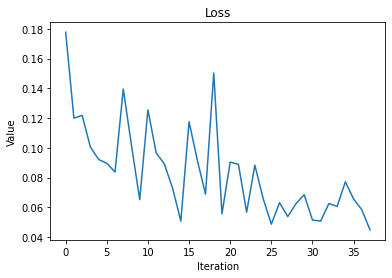

In [ ]:
visualize_loss(model_emb_result["loss_stats_train"][1:])

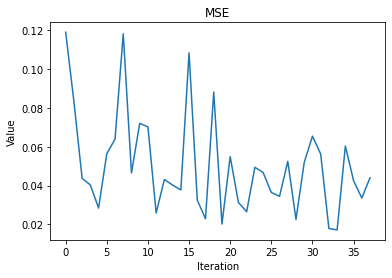

In [ ]:
visualize_mse(model_emb_result["mse_stats"][1:])

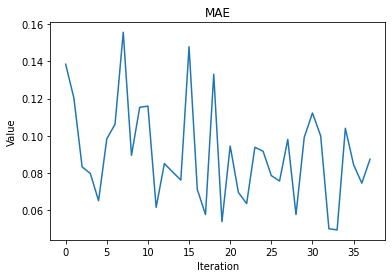

In [ ]:
visualize_mae(model_emb_result["mae_stats"][1:])

Теперь с замороженными весами эмбеддингов

In [ ]:
class SalaryPredictorFreeze(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=300):
        super().__init__()
        self.embedder = embedding_freeze
        self.title_encoder = nn.Sequential(
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.BatchNorm1d(hid_size),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.BatchNorm1d(hid_size),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.BatchNorm1d(hid_size*2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.BatchNorm1d(hid_size*2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.BatchNorm1d(hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
        
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features = self.title_encoder(title_embeddings).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features = self.description_encoder(description_embeddings).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_feeze = SalaryPredictorFreeze().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_feeze.parameters(), lr=1e-3)

model_feeze_result = train_model(model_feeze, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.367177814245224
test results:
Mean square error: 0.30412
Mean absolute error: 0.23583
train_loss 0.18283426761627197
test results:
Mean square error: 0.05905
Mean absolute error: 0.09613
train_loss 0.10957644879817963
test results:
Mean square error: 0.03662
Mean absolute error: 0.07493
train_loss 0.15297436714172363
test results:
Mean square error: 0.07823
Mean absolute error: 0.11793
train_loss 0.1608564853668213
test results:
Mean square error: 0.05584
Mean absolute error: 0.09669
train_loss 0.1401745229959488
test results:
Mean square error: 0.02584
Mean absolute error: 0.06129
train_loss 0.14000840485095978
test results:
Mean square error: 0.02905
Mean absolute error: 0.06603
train_loss 0.08412295579910278
test results:
Mean square error: 0.04134
Mean absolute error: 0.08168
train_loss 0.07134126126766205
test results:
Mean square error: 0.03206
Mean absolute error: 0.06943
train_loss 0.08170762658119202
test results:
Mean square error: 0.09444
Mean absolute error: 0.

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.059360623359680176
test results:
Mean square error: 0.03751
Mean absolute error: 0.07711
train_loss 0.06100013479590416
test results:
Mean square error: 0.04821
Mean absolute error: 0.08600
train_loss 0.08483662456274033
test results:
Mean square error: 0.03009
Mean absolute error: 0.06775
train_loss 0.07897985726594925
test results:
Mean square error: 0.03902
Mean absolute error: 0.08054
train_loss 0.08357930183410645
test results:
Mean square error: 0.04581
Mean absolute error: 0.08402
train_loss 0.07806160300970078
test results:
Mean square error: 0.03487
Mean absolute error: 0.07573
train_loss 0.07491979002952576
test results:
Mean square error: 0.03193
Mean absolute error: 0.07164
train_loss 0.050443172454833984
test results:
Mean square error: 0.03229
Mean absolute error: 0.07007
train_loss 0.05211290717124939
test results:
Mean square error: 0.05529
Mean absolute error: 0.09807
train_loss 0.10016362369060516
test results:
Mean square error: 0.03142
Mean absolute err

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.06826991587877274
test results:
Mean square error: 0.04653
Mean absolute error: 0.09141
train_loss 0.06403488665819168
test results:
Mean square error: 0.03126
Mean absolute error: 0.07049
train_loss 0.0758998692035675
test results:
Mean square error: 0.03327
Mean absolute error: 0.07381
train_loss 0.06620679795742035
test results:
Mean square error: 0.02607
Mean absolute error: 0.06274
train_loss 0.09135278314352036
test results:
Mean square error: 0.02168
Mean absolute error: 0.05732
train_loss 0.06757661700248718
test results:
Mean square error: 0.02265
Mean absolute error: 0.05833
train_loss 0.08677208423614502
test results:
Mean square error: 0.02013
Mean absolute error: 0.05381
train_loss 0.08610114455223083
test results:
Mean square error: 0.09861
Mean absolute error: 0.14317
train_loss 0.08901460468769073
test results:
Mean square error: 0.02330
Mean absolute error: 0.05869
train_loss 0.06921826303005219
test results:
Mean square error: 0.04798
Mean absolute error:

In [ ]:
print_metrics(model_feeze, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.10023
Mean absolute error: 0.14283


(0.10022504130999248, 0.14282519618670145)

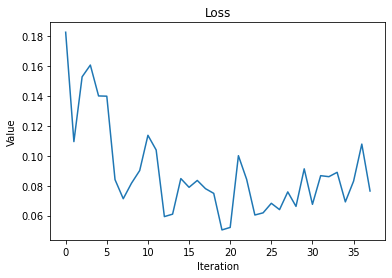

In [ ]:
visualize_loss(model_feeze_result["loss_stats_train"][1:])

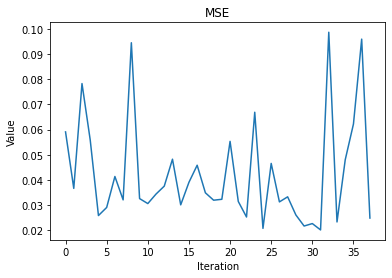

In [ ]:
visualize_mse(model_feeze_result["mse_stats"][1:])

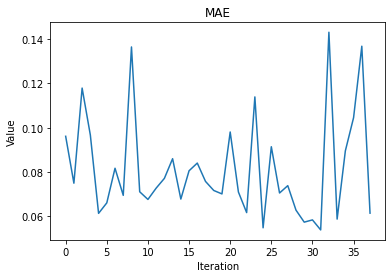

In [ ]:
visualize_mae(model_feeze_result["mae_stats"][1:])

Сравните результаты:
1.   Эмбеддингов, инициализируемых случайно:

      Mean square error: 0.16824

      Mean absolute error: 0.16154
2.   Предобученных эмбеддингов с замороженными весами

      Mean square error: 0.10023

      Mean absolute error: 0.14283
3.   Предобученных эмбеддингов с обучаемыми весами

      Mean square error: 0.07029

      Mean absolute error: 0.11640

Лучший результат дает модель с предобученными эмбеддингами с обучаемыми весами.

**4. Замените сверточные слои на рекуррентные (3 балла)**

* Замените сверточне слоим рекуррентными LSTM/GRU.

In [ ]:
class SalaryPredictor_LSTM(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8, length=35, bidirectional=False):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.lstm = nn.LSTM(length, hid_size, 2)
        self.title_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
        
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features, (_h, _h) = self.lstm(title_embeddings)
        title_features = self.title_encoder(title_features).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features, (_h, _c) = self.lstm(description_embeddings)
        description_features = self.description_encoder(description_features).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
def print_metrics_v2(model, data, batch_size, max_len=35, name="", **kw):
    squared_error = abs_error = num_samples = 0.0
    model.eval()
    with torch.no_grad():
        for batch in iterate_minibatches(data, batch_size=batch_size, max_len=max_len, shuffle=False, **kw):
            batch_pred = model(batch)
            squared_error += torch.mean(torch.square(batch_pred - batch[TARGET_COLUMN]))
            abs_error += torch.mean(torch.abs(batch_pred - batch[TARGET_COLUMN]))
            num_samples += len(batch)
    mse = squared_error.detach().cpu().numpy() / num_samples
    mae = abs_error.detach().cpu().numpy() / num_samples
    if name != "train":
        print("%s results:" % (name or ""))
        print("Mean square error: %.5f" % mse)
        print("Mean absolute error: %.5f" % mae)
    return mse, mae

def train_model_v2(model, data_train, data_test, optimizer, criterion, epochs = EPOCHS, batch_size=BATCH_SIZE, device=DEVICE, max_len=35):
  loss_stats_train, mse_stats, mae_stats = [], [], []
  for epoch in range(epochs):
    print(f"epoch: {epoch}")
    for i, batch in tqdm.notebook.tqdm(enumerate(
            iterate_minibatches(
                    data_train, 
                    batch_size=batch_size, 
                    device=device,
                    max_len=max_len)), 
                total=len(data_train) // batch_size
        ):
        model.train()
        pred = model(batch)
        optimizer.zero_grad()
        loss = criterion(pred, batch[TARGET_COLUMN])
        loss.backward()
        optimizer.step()

        if i % 100 == 99:
            print('train_loss', loss.item())
            mse, mae = print_metrics_v2(model, data_val, name='test', batch_size=batch_size, device=device, max_len=max_len)
            mse_stats.append(mse)
            mae_stats.append(mae)
            loss_stats_train.append(float(loss.item()))
        
  return {"loss_stats_train": loss_stats_train, "mse_stats": mse_stats, "mae_stats": mae_stats}


In [ ]:
model_lstm = SalaryPredictor_LSTM().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=1e-3)

model_lstm_result = train_model_v2(model_lstm, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 5.908346176147461
test results:
Mean square error: 1.26056
Mean absolute error: 0.54721
train_loss 0.6331663131713867
test results:
Mean square error: 0.17709
Mean absolute error: 0.17923
train_loss 0.3893413543701172
test results:
Mean square error: 0.25557
Mean absolute error: 0.22694
train_loss 0.3351845145225525
test results:
Mean square error: 0.28380
Mean absolute error: 0.24374
train_loss 0.26636290550231934
test results:
Mean square error: 0.29688
Mean absolute error: 0.25110
train_loss 0.17110884189605713
test results:
Mean square error: 0.28090
Mean absolute error: 0.24460
train_loss 0.24367401003837585
test results:
Mean square error: 0.31212
Mean absolute error: 0.26041
train_loss 0.14759114384651184
test results:
Mean square error: 0.30075
Mean absolute error: 0.25557
train_loss 0.17061904072761536
test results:
Mean square error: 0.27941
Mean absolute error: 0.24544
train_loss 0.2245284914970398
test results:
Mean square error: 0.28784
Mean absolute error: 0.24

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.16507869958877563
test results:
Mean square error: 0.25071
Mean absolute error: 0.23134
train_loss 0.1650959551334381
test results:
Mean square error: 0.22297
Mean absolute error: 0.21613
train_loss 0.16701053082942963
test results:
Mean square error: 0.23355
Mean absolute error: 0.22211
train_loss 0.15405011177062988
test results:
Mean square error: 0.20530
Mean absolute error: 0.20600
train_loss 0.15219467878341675
test results:
Mean square error: 0.21486
Mean absolute error: 0.21172
train_loss 0.13244958221912384
test results:
Mean square error: 0.23010
Mean absolute error: 0.22042
train_loss 0.1420586109161377
test results:
Mean square error: 0.20158
Mean absolute error: 0.20407
train_loss 0.15665015578269958
test results:
Mean square error: 0.20717
Mean absolute error: 0.20735
train_loss 0.14738602936267853
test results:
Mean square error: 0.20050
Mean absolute error: 0.20348
train_loss 0.17251482605934143
test results:
Mean square error: 0.19404
Mean absolute error: 

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.19371458888053894
test results:
Mean square error: 0.17752
Mean absolute error: 0.19016
train_loss 0.16261586546897888
test results:
Mean square error: 0.18849
Mean absolute error: 0.19734
train_loss 0.15698495507240295
test results:
Mean square error: 0.20128
Mean absolute error: 0.20555
train_loss 0.12037555873394012
test results:
Mean square error: 0.16332
Mean absolute error: 0.18202
train_loss 0.117500439286232
test results:
Mean square error: 0.17705
Mean absolute error: 0.19152
train_loss 0.14076203107833862
test results:
Mean square error: 0.15944
Mean absolute error: 0.18056
train_loss 0.11764972656965256
test results:
Mean square error: 0.15636
Mean absolute error: 0.17912
train_loss 0.11631868034601212
test results:
Mean square error: 0.17168
Mean absolute error: 0.18948
train_loss 0.15437225997447968
test results:
Mean square error: 0.15607
Mean absolute error: 0.17983
train_loss 0.10561123490333557
test results:
Mean square error: 0.15844
Mean absolute error: 

In [ ]:
print_metrics_v2(model_lstm, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.16074
Mean absolute error: 0.18440


(0.16073760390281677, 0.18439765771230063)

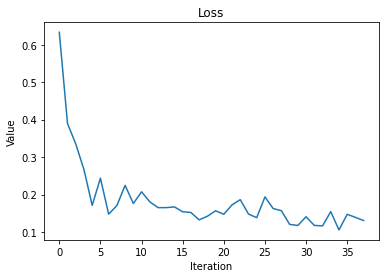

In [ ]:
visualize_loss(model_lstm_result["loss_stats_train"][1:])

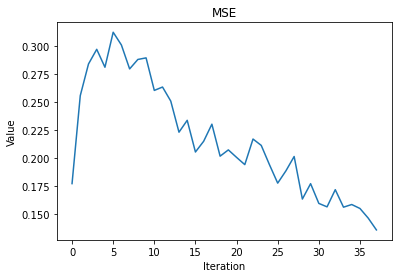

In [ ]:
visualize_mse(model_lstm_result["mse_stats"][1:])

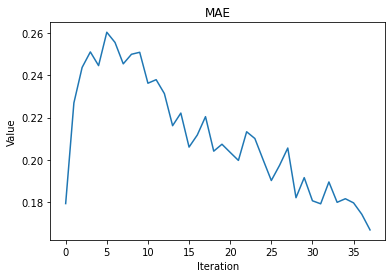

In [ ]:
visualize_mae(model_lstm_result["mae_stats"][1:])

In [ ]:
class SalaryPredictor_GRU(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8, length=35, bidirectional=False):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.gru = nn.GRU(length, hid_size, 2)
        self.title_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
        
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features, (_h, _h) = self.gru(title_embeddings)
        title_features = self.title_encoder(title_features).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features, (_h, _c) = self.gru(description_embeddings)
        description_features = self.description_encoder(description_features).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_gru = SalaryPredictor_GRU().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_gru.parameters(), lr=1e-3)

model_gru_result = train_model_v2(model_gru, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 19.77320671081543
test results:
Mean square error: 5.32370
Mean absolute error: 1.14688
train_loss 0.7535369396209717
test results:
Mean square error: 0.17543
Mean absolute error: 0.17860
train_loss 0.4277644455432892
test results:
Mean square error: 0.24263
Mean absolute error: 0.22136
train_loss 0.3997025489807129
test results:
Mean square error: 0.24433
Mean absolute error: 0.22445
train_loss 0.29307299852371216
test results:
Mean square error: 0.24114
Mean absolute error: 0.22395
train_loss 0.19627852737903595
test results:
Mean square error: 0.27026
Mean absolute error: 0.23992
train_loss 0.22696776688098907
test results:
Mean square error: 0.25687
Mean absolute error: 0.23365
train_loss 0.20085319876670837
test results:
Mean square error: 0.27374
Mean absolute error: 0.24275
train_loss 0.18793095648288727
test results:
Mean square error: 0.25875
Mean absolute error: 0.23518
train_loss 0.13760606944561005
test results:
Mean square error: 0.27586
Mean absolute error: 0.2

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.1519583761692047
test results:
Mean square error: 0.21118
Mean absolute error: 0.20976
train_loss 0.19647623598575592
test results:
Mean square error: 0.24661
Mean absolute error: 0.22964
train_loss 0.16611063480377197
test results:
Mean square error: 0.22081
Mean absolute error: 0.21543
train_loss 0.1740296185016632
test results:
Mean square error: 0.24812
Mean absolute error: 0.23056
train_loss 0.16284872591495514
test results:
Mean square error: 0.23794
Mean absolute error: 0.22510
train_loss 0.18955940008163452
test results:
Mean square error: 0.23613
Mean absolute error: 0.22417
train_loss 0.17507195472717285
test results:
Mean square error: 0.22089
Mean absolute error: 0.21579
train_loss 0.15481685101985931
test results:
Mean square error: 0.24013
Mean absolute error: 0.22651
train_loss 0.15904934704303741
test results:
Mean square error: 0.19638
Mean absolute error: 0.20142
train_loss 0.1605602651834488
test results:
Mean square error: 0.19672
Mean absolute error: 0

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.12994666397571564
test results:
Mean square error: 0.19766
Mean absolute error: 0.20239
train_loss 0.12679608166217804
test results:
Mean square error: 0.18805
Mean absolute error: 0.19658
train_loss 0.2087562531232834
test results:
Mean square error: 0.16910
Mean absolute error: 0.18449
train_loss 0.1532185822725296
test results:
Mean square error: 0.17049
Mean absolute error: 0.18555
train_loss 0.19868455827236176
test results:
Mean square error: 0.18021
Mean absolute error: 0.19178
train_loss 0.12981078028678894
test results:
Mean square error: 0.16024
Mean absolute error: 0.17892
train_loss 0.1255161315202713
test results:
Mean square error: 0.15813
Mean absolute error: 0.17752
train_loss 0.15890762209892273
test results:
Mean square error: 0.15322
Mean absolute error: 0.17427
train_loss 0.1483260542154312
test results:
Mean square error: 0.16861
Mean absolute error: 0.18442
train_loss 0.14570403099060059
test results:
Mean square error: 0.15275
Mean absolute error: 0.

In [ ]:
print_metrics_v2(model_gru, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.15205
Mean absolute error: 0.17356


(0.1520488957564036, 0.17355793714523315)

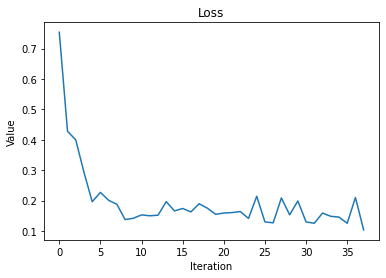

In [ ]:
visualize_loss(model_gru_result["loss_stats_train"][1:])

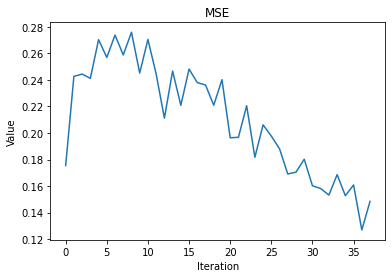

In [ ]:
visualize_mse(model_gru_result["mse_stats"][1:])

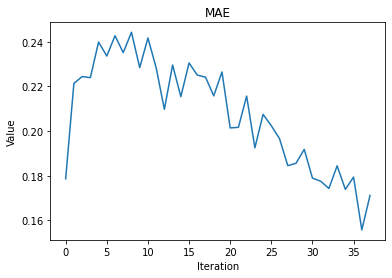

In [ ]:
visualize_mae(model_gru_result["mae_stats"][1:])

* Проведите эксперимент с однонаправленной и двунаправленной рекуррентной нейросетью

In [ ]:
class SalaryPredictor_LSTM_bidir(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8, length=35, bidirectional=True):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.lstm = nn.LSTM(length, hid_size, 2, bidirectional = bidirectional)
        self.title_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
        
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features, (_h, _h) = self.lstm(title_embeddings)
        title_features = self.title_encoder(title_features).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features, (_h, _c) = self.lstm(description_embeddings)
        description_features = self.description_encoder(description_features).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_lstm_bidir = SalaryPredictor_LSTM_bidir().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_lstm_bidir.parameters(), lr=1e-3)

model_lstm_bidir_result = train_model_v2(model_lstm_bidir, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 1.497200608253479
test results:
Mean square error: 0.64028
Mean absolute error: 0.38014
train_loss 0.5626223087310791
test results:
Mean square error: 0.36238
Mean absolute error: 0.27705
train_loss 0.6451719999313354
test results:
Mean square error: 0.38144
Mean absolute error: 0.28755
train_loss 0.43391016125679016
test results:
Mean square error: 0.37781
Mean absolute error: 0.28756
train_loss 0.3026188015937805
test results:
Mean square error: 0.37935
Mean absolute error: 0.28932
train_loss 0.32338422536849976
test results:
Mean square error: 0.37847
Mean absolute error: 0.28970
train_loss 0.25569137930870056
test results:
Mean square error: 0.34063
Mean absolute error: 0.27366
train_loss 0.2674763798713684
test results:
Mean square error: 0.37076
Mean absolute error: 0.28734
train_loss 0.21728140115737915
test results:
Mean square error: 0.31546
Mean absolute error: 0.26281
train_loss 0.23374132812023163
test results:
Mean square error: 0.31369
Mean absolute error: 0.26

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.20474688708782196
test results:
Mean square error: 0.27960
Mean absolute error: 0.24657
train_loss 0.13152562081813812
test results:
Mean square error: 0.27371
Mean absolute error: 0.24376
train_loss 0.1261870265007019
test results:
Mean square error: 0.28689
Mean absolute error: 0.25042
train_loss 0.15657271444797516
test results:
Mean square error: 0.26413
Mean absolute error: 0.23896
train_loss 0.16887611150741577
test results:
Mean square error: 0.27848
Mean absolute error: 0.24643
train_loss 0.16878357529640198
test results:
Mean square error: 0.26096
Mean absolute error: 0.23755
train_loss 0.15720908343791962
test results:
Mean square error: 0.24968
Mean absolute error: 0.23165
train_loss 0.16780135035514832
test results:
Mean square error: 0.26194
Mean absolute error: 0.23814
train_loss 0.1610172688961029
test results:
Mean square error: 0.25633
Mean absolute error: 0.23537
train_loss 0.15063408017158508
test results:
Mean square error: 0.23815
Mean absolute error: 

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.17023561894893646
test results:
Mean square error: 0.24935
Mean absolute error: 0.23212
train_loss 0.15879926085472107
test results:
Mean square error: 0.23816
Mean absolute error: 0.22616
train_loss 0.1425657868385315
test results:
Mean square error: 0.22961
Mean absolute error: 0.22157
train_loss 0.17193633317947388
test results:
Mean square error: 0.23310
Mean absolute error: 0.22363
train_loss 0.12840770184993744
test results:
Mean square error: 0.24528
Mean absolute error: 0.23035
train_loss 0.14508649706840515
test results:
Mean square error: 0.23506
Mean absolute error: 0.22493
train_loss 0.15121573209762573
test results:
Mean square error: 0.27227
Mean absolute error: 0.24463
train_loss 0.13114187121391296
test results:
Mean square error: 0.23642
Mean absolute error: 0.22583
train_loss 0.21499840915203094
test results:
Mean square error: 0.23483
Mean absolute error: 0.22517
train_loss 0.13664889335632324
test results:
Mean square error: 0.26669
Mean absolute error:

In [ ]:
print_metrics_v2(model_lstm_bidir, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.20449
Mean absolute error: 0.20869


(0.20448656876881918, 0.20869318644205728)

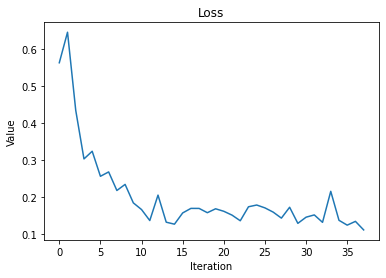

In [ ]:
visualize_loss(model_lstm_bidir_result["loss_stats_train"][1:])

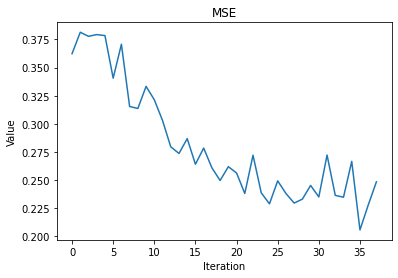

In [ ]:
visualize_mse(model_lstm_bidir_result["mse_stats"][1:])

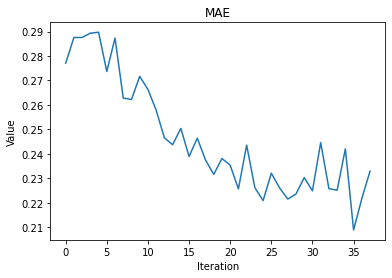

In [ ]:
visualize_mae(model_lstm_bidir_result["mae_stats"][1:])

In [ ]:
class SalaryPredictor_GRU_bidir(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8, length=35, bidirectional=True):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.gru = nn.GRU(length, hid_size, bidirectional = bidirectional)
        self.title_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
        
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features, (_h, _h) = self.gru(title_embeddings)
        title_features = self.title_encoder(title_features).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features, (_h, _c) = self.gru(description_embeddings)
        description_features = self.description_encoder(description_features).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_gru_bidir = SalaryPredictor_GRU_bidir().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_gru_bidir.parameters(), lr=1e-3)

model_gru_bidir_result = train_model_v2(model_gru_bidir, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.8752937316894531
test results:
Mean square error: 0.44494
Mean absolute error: 0.30585
train_loss 0.2764437198638916
test results:
Mean square error: 0.40479
Mean absolute error: 0.29208
train_loss 0.4116673171520233
test results:
Mean square error: 0.41451
Mean absolute error: 0.29944
train_loss 0.28115394711494446
test results:
Mean square error: 0.38305
Mean absolute error: 0.28825
train_loss 0.3143446445465088
test results:
Mean square error: 0.39962
Mean absolute error: 0.29658
train_loss 0.2445334792137146
test results:
Mean square error: 0.34202
Mean absolute error: 0.27240
train_loss 0.26031196117401123
test results:
Mean square error: 0.37998
Mean absolute error: 0.28983
train_loss 0.19724030792713165
test results:
Mean square error: 0.33965
Mean absolute error: 0.27259
train_loss 0.25990504026412964
test results:
Mean square error: 0.32353
Mean absolute error: 0.26555
train_loss 0.22114858031272888
test results:
Mean square error: 0.31439
Mean absolute error: 0.2

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.17214328050613403
test results:
Mean square error: 0.29251
Mean absolute error: 0.25220
train_loss 0.19570863246917725
test results:
Mean square error: 0.30932
Mean absolute error: 0.26047
train_loss 0.13102290034294128
test results:
Mean square error: 0.28436
Mean absolute error: 0.24850
train_loss 0.14415128529071808
test results:
Mean square error: 0.28014
Mean absolute error: 0.24660
train_loss 0.24510106444358826
test results:
Mean square error: 0.24397
Mean absolute error: 0.22799
train_loss 0.15442201495170593
test results:
Mean square error: 0.25555
Mean absolute error: 0.23426
train_loss 0.1571081578731537
test results:
Mean square error: 0.23193
Mean absolute error: 0.22170
train_loss 0.16262242197990417
test results:
Mean square error: 0.22992
Mean absolute error: 0.22079
train_loss 0.14457084238529205
test results:
Mean square error: 0.23161
Mean absolute error: 0.22200
train_loss 0.17435580492019653
test results:
Mean square error: 0.23282
Mean absolute error:

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.15811854600906372
test results:
Mean square error: 0.19679
Mean absolute error: 0.20307
train_loss 0.16059273481369019
test results:
Mean square error: 0.19536
Mean absolute error: 0.20241
train_loss 0.11953793466091156
test results:
Mean square error: 0.20378
Mean absolute error: 0.20747
train_loss 0.12900596857070923
test results:
Mean square error: 0.17432
Mean absolute error: 0.18961
train_loss 0.13858762383460999
test results:
Mean square error: 0.16979
Mean absolute error: 0.18680
train_loss 0.15574142336845398
test results:
Mean square error: 0.17509
Mean absolute error: 0.19053
train_loss 0.13232304155826569
test results:
Mean square error: 0.17626
Mean absolute error: 0.19152
train_loss 0.129123717546463
test results:
Mean square error: 0.16376
Mean absolute error: 0.18357
train_loss 0.11893270909786224
test results:
Mean square error: 0.14693
Mean absolute error: 0.17230
train_loss 0.11463867872953415
test results:
Mean square error: 0.14639
Mean absolute error: 

In [ ]:
print_metrics_v2(model_gru_bidir, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.15908
Mean absolute error: 0.18160


(0.15908398230870566, 0.18159673611323038)

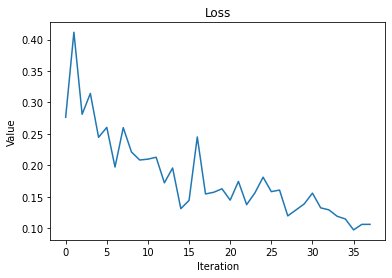

In [ ]:
visualize_loss(model_gru_bidir_result["loss_stats_train"][1:])

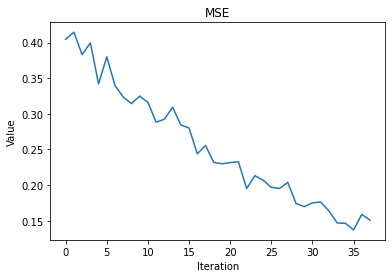

In [ ]:
visualize_mse(model_gru_bidir_result["mse_stats"][1:])

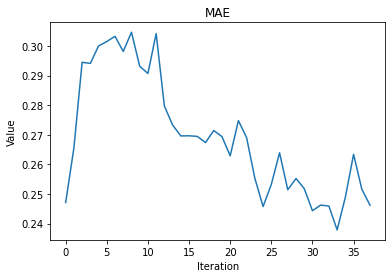

In [ ]:
visualize_mae(model_gru_bidir_result["mae_stats"][1:])

Замена сверточных слоев рекуррентными не дает более качественного результата.

* Попробуйте найти удачный микс рекуррентных и сверточных слоев. Попробуйте разные миксы для Title и FullDescription

In [ ]:
class SalaryPredictorMixed(nn.Module):
    def __init__(self, n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=8, length=35, bidirectional=False):
        super().__init__()
        self.embedder = nn.Embedding(n_tokens, hid_size)
        self.gru = nn.GRU(length, hid_size, 2)
        self.title_encoder = nn.Sequential(
            nn.GroupNorm(4, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.description_encoder = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size),
            nn.Conv1d(hid_size, hid_size, kernel_size=2),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=1)
        )
        self.categorical_encoder = nn.Sequential(
            nn.Linear(n_cat_features, hid_size * 2),
            nn.GroupNorm(8, hid_size * 2),
            nn.ReLU(),
            nn.Linear(hid_size * 2, hid_size * 2),
            nn.ReLU()
        )
        self.final_predictor = nn.Sequential(
            nn.GroupNorm(hid_size, hid_size * 4),
            nn.Linear(hid_size * 4, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )
      
    def forward(self, batch):
        title_embeddings = self.embedder(batch['Title']).permute(0, 2, 1)
        title_features, (_h, _h) = self.gru(title_embeddings)
        title_features = self.title_encoder(title_features).squeeze()

        description_embeddings = self.embedder(batch['FullDescription']).permute(0, 2, 1)
        description_features, (_h, _c) = self.gru(description_embeddings)
        description_features = self.description_encoder(description_features).squeeze()

        categorical_features = self.categorical_encoder(batch['Categorical'])

        features = torch.cat(
            [title_features, description_features, categorical_features], dim=1)
        
        return self.final_predictor(features).squeeze()

In [ ]:
model_mixed = SalaryPredictorMixed().to(DEVICE)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model_mixed.parameters(), lr=1e-3)

model_mixed_result = train_model_v2(model_mixed, data_train, data_test, optimizer, criterion)

epoch: 0


  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 26.790428161621094
test results:
Mean square error: 6.30527
Mean absolute error: 1.24945
train_loss 0.3954460620880127
test results:
Mean square error: 0.06455
Mean absolute error: 0.10235
train_loss 0.22629673779010773
test results:
Mean square error: 0.06150
Mean absolute error: 0.09972
train_loss 0.21275953948497772
test results:
Mean square error: 0.05692
Mean absolute error: 0.09596
train_loss 0.20887011289596558
test results:
Mean square error: 0.05496
Mean absolute error: 0.09394
train_loss 0.2454463243484497
test results:
Mean square error: 0.05220
Mean absolute error: 0.09148
train_loss 0.22483333945274353
test results:
Mean square error: 0.04823
Mean absolute error: 0.08754
train_loss 0.20548933744430542
test results:
Mean square error: 0.04603
Mean absolute error: 0.08512
train_loss 0.22902071475982666
test results:
Mean square error: 0.04545
Mean absolute error: 0.08474
train_loss 0.20163209736347198
test results:
Mean square error: 0.04445
Mean absolute error: 0

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.226161390542984
test results:
Mean square error: 0.04339
Mean absolute error: 0.08254
train_loss 0.1803492158651352
test results:
Mean square error: 0.04288
Mean absolute error: 0.08188
train_loss 0.19162818789482117
test results:
Mean square error: 0.04251
Mean absolute error: 0.08123
train_loss 0.17048630118370056
test results:
Mean square error: 0.04227
Mean absolute error: 0.08080
train_loss 0.21368038654327393
test results:
Mean square error: 0.04236
Mean absolute error: 0.08094
train_loss 0.19502708315849304
test results:
Mean square error: 0.04175
Mean absolute error: 0.08039
train_loss 0.14914104342460632
test results:
Mean square error: 0.04193
Mean absolute error: 0.08043
train_loss 0.1819802224636078
test results:
Mean square error: 0.04173
Mean absolute error: 0.08007
train_loss 0.17879369854927063
test results:
Mean square error: 0.04099
Mean absolute error: 0.07923
train_loss 0.15797898173332214
test results:
Mean square error: 0.04123
Mean absolute error: 0.

  0%|          | 0/1376 [00:00<?, ?it/s]

train_loss 0.15110278129577637
test results:
Mean square error: 0.04018
Mean absolute error: 0.07852
train_loss 0.14408022165298462
test results:
Mean square error: 0.04027
Mean absolute error: 0.07887
train_loss 0.19782215356826782
test results:
Mean square error: 0.03948
Mean absolute error: 0.07754
train_loss 0.1761767566204071
test results:
Mean square error: 0.03998
Mean absolute error: 0.07792
train_loss 0.1729377955198288
test results:
Mean square error: 0.04001
Mean absolute error: 0.07810
train_loss 0.17432858049869537
test results:
Mean square error: 0.04031
Mean absolute error: 0.07891
train_loss 0.15175390243530273
test results:
Mean square error: 0.04035
Mean absolute error: 0.07862
train_loss 0.1744835376739502
test results:
Mean square error: 0.04010
Mean absolute error: 0.07843
train_loss 0.1315285563468933
test results:
Mean square error: 0.03988
Mean absolute error: 0.07792
train_loss 0.1476902812719345
test results:
Mean square error: 0.03952
Mean absolute error: 0.0

In [ ]:
print_metrics_v2(model_mixed, data_val, name='val', batch_size=BATCH_SIZE, device=DEVICE)

val results:
Mean square error: 0.04001
Mean absolute error: 0.07815


(0.040011788407961525, 0.07815090318520863)

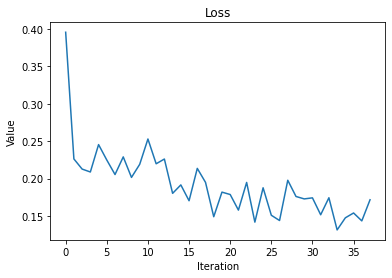

In [ ]:
visualize_loss(model_mixed_result["loss_stats_train"][1:])

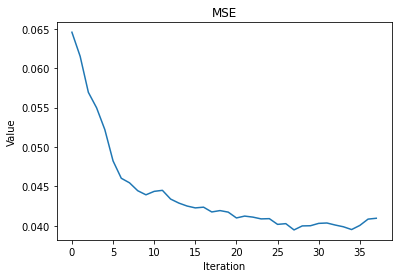

In [ ]:
visualize_mse(model_mixed_result["mse_stats"][1:])

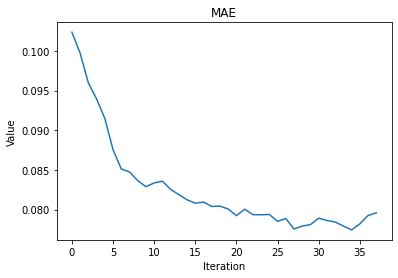

In [ ]:
visualize_mae(model_mixed_result["mae_stats"][1:])

Этот вариант кажется наиболее удачным.